In [0]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("Project").getOrCreate()
df =spark.read.csv('dbfs:/FileStore/shared_uploads/v.shete@saama.com/data-5.csv',header=True,inferSchema=True)

In [0]:
import pyspark

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [0]:
df.printSchema()

root
-- id: integer (nullable = true)
-- diagnosis: string (nullable = true)
-- radius_mean: double (nullable = true)
-- texture_mean: double (nullable = true)
-- perimeter_mean: double (nullable = true)
-- area_mean: double (nullable = true)
-- smoothness_mean: double (nullable = true)
-- compactness_mean: double (nullable = true)
-- concavity_mean: double (nullable = true)
-- concave points_mean: double (nullable = true)
-- symmetry_mean: double (nullable = true)
-- fractal_dimension_mean: double (nullable = true)
-- radius_se: double (nullable = true)
-- texture_se: double (nullable = true)
-- perimeter_se: double (nullable = true)
-- area_se: double (nullable = true)
-- smoothness_se: double (nullable = true)
-- compactness_se: double (nullable = true)
-- concavity_se: double (nullable = true)
-- concave points_se: double (nullable = true)
-- symmetry_se: double (nullable = true)
-- fractal_dimension_se: double (nullable = true)
-- radius_worst: double (nullable = true)
-- texture_worst: double (nullable = true)
-- perimeter_worst: double (nullable = true)
-- area_worst: double (nullable = true)
-- smoothness_worst: double (nullable = true)
-- compactness_worst: double (nullable = true)
-- concavity_worst: double (nullable = true)
-- concave points_worst: double (nullable = true)
-- symmetry_worst: double (nullable = true)
-- fractal_dimension_worst: double (nullable = true)
-- _c32: string (nullable = true)

In [0]:
df.show()

+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----+
 id|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|_c32|
+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----+
 842302| M| 17.99| 10.38| 122.8| 1001.0| 0.1184| 0.2776| 0.3001| 0.1471| 0.2419| 0.07871| 1.095| 0.9053| 8.589| 153.4| 0.006399| 0.04904| 0.05373| 0.01587| 0.03003| 0.006193| 25.38| 17.33| 184.6| 2019.0| 0.1622| 0.6656| 0.7119| 0.2654| 0.4601| 0.1189|null|
 842517| M| 20.57| 17.77| 132.9| 1326.0| 0.08474| 0.07864| 0.0869| 0.07017| 0.1812| 0.05667| 0.5435| 0.7339| 3.398| 74.08| 0.005225| 0.01308| 0.0186| 0.0134| 0.01389| 0.003532| 24.99| 23.41| 158.8| 1956.0| 0.1238| 0.1866| 0.2416| 0.186| 0.275| 0.08902|null|
84300903| M| 19.69| 21.25| 130.0| 1203.0| 0.1096| 0.1599| 0.1974| 0.1279| 0.2069| 0.05999| 0.7456| 0.7869| 4.585| 94.03| 0.00615| 0.04006| 0.03832| 0.02058| 0.0225| 0.004571| 23.57| 25.53| 152.5| 1709.0| 0.1444| 0.4245| 0.4504| 0.243| 0.3613| 0.08758|null|
84348301| M| 11.42| 20.38| 77.58| 386.1| 0.1425| 0.2839| 0.2414| 0.1052| 0.2597| 0.09744| 0.4956| 1.156| 3.445| 27.23| 0.00911| 0.07458| 0.05661| 0.01867| 0.05963| 0.009208| 14.91| 26.5| 98.87| 567.7| 0.2098| 0.8663| 0.6869| 0.2575| 0.6638| 0.173|null|
84358402| M| 20.29| 14.34| 135.1| 1297.0| 0.1003| 0.1328| 0.198| 0.1043| 0.1809| 0.05883| 0.7572| 0.7813| 5.438| 94.44| 0.01149| 0.02461| 0.05688| 0.01885| 0.01756| 0.005115| 22.54| 16.67| 152.2| 1575.0| 0.1374| 0.205| 0.4| 0.1625| 0.2364| 0.07678|null|
 843786| M| 12.45| 15.7| 82.57| 477.1| 0.1278| 0.17| 0.1578| 0.08089| 0.2087| 0.07613| 0.3345| 0.8902| 2.217| 27.19| 0.00751| 0.03345| 0.03672| 0.01137| 0.02165| 0.005082| 15.47| 23.75| 103.4| 741.6| 0.1791| 0.5249| 0.5355| 0.1741| 0.3985| 0.1244|null|
 844359| M| 18.25| 19.98| 119.6| 1040.0| 0.09463| 0.109| 0.1127| 0.074| 0.1794| 0.05742| 0.4467| 0.7732| 3.18| 53.91| 0.004314| 0.01382| 0.02254| 0.01039| 0.01369| 0.002179| 22.88| 27.66| 153.2| 1606.0| 0.1442| 0.2576| 0.3784| 0.1932| 0.3063| 0.08368|null|
84458202| M| 13.71| 20.83| 90.2| 577.9| 0.1189| 0.1645| 0.09366| 0.05985| 0.2196| 0.07451| 0.5835| 1.377| 3.856| 50.96| 0.008805| 0.03029| 0.02488| 0.01448| 0.01486| 0.005412| 17.06| 28.14| 110.6| 897.0| 0.1654| 0.3682| 0.2678| 0.1556| 0.3196| 0.1151|null|
 844981| M| 13.0| 21.82| 87.5| 519.8| 0.1273| 0.1932| 0.1859| 0.09353| 0.235| 0.07389| 0.3063| 1.002| 2.406| 24.32| 0.005731| 0.03502| 0.03553| 0.01226| 0.02143| 0.003749| 15.49| 30.73| 106.2| 739.3| 0.1703| 0.5401| 0.539| 0.206| 0.4378| 0.1072|null|
84501001| M| 12.46| 24.04| 83.97| 475.9| 0.1186| 0.2396| 0.2273| 0.08543| 0.203| 0.08243| 0.2976| 1.599| 2.039| 23.94| 0.007149| 0.07217| 0.07743| 0.01432| 0.01789| 0.01008| 15.09| 40.68| 97.65| 711.4| 0.1853| 1.058| 1.105| 0.221| 0.4366| 0.2075|null|
 845636| M| 16

In [0]:
df.columns

Out[7]: ['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 '_c32']

In [0]:
df.dtypes

Out[8]: [('id', 'int'),
 ('diagnosis', 'string'),
 ('radius_mean', 'double'),
 ('texture_mean', 'double'),
 ('perimeter_mean', 'double'),
 ('area_mean', 'double'),
 ('smoothness_mean', 'double'),
 ('compactness_mean', 'double'),
 ('concavity_mean', 'double'),
 ('concave points_mean', 'double'),
 ('symmetry_mean', 'double'),
 ('fractal_dimension_mean', 'double'),
 ('radius_se', 'double'),
 ('texture_se', 'double'),
 ('perimeter_se', 'double'),
 ('area_se', 'double'),
 ('smoothness_se', 'double'),
 ('compactness_se', 'double'),
 ('concavity_se', 'double'),
 ('concave points_se', 'double'),
 ('symmetry_se', 'double'),
 ('fractal_dimension_se', 'double'),
 ('radius_worst', 'double'),
 ('texture_worst', 'double'),
 ('perimeter_worst', 'double'),
 ('area_worst', 'double'),
 ('smoothness_worst', 'double'),
 ('compactness_worst', 'double'),
 ('concavity_worst', 'double'),
 ('concave points_worst', 'double'),
 ('symmetry_worst', 'double'),
 ('fractal_dimension_worst', 'double'),
 ('_c32', 'string')]

In [0]:
df.describe()

Out[9]: DataFrame[summary: string, id: string, diagnosis: string, radius_mean: string, texture_mean: string, perimeter_mean: string, area_mean: string, smoothness_mean: string, compactness_mean: string, concavity_mean: string, concave points_mean: string, symmetry_mean: string, fractal_dimension_mean: string, radius_se: string, texture_se: string, perimeter_se: string, area_se: string, smoothness_se: string, compactness_se: string, concavity_se: string, concave points_se: string, symmetry_se: string, fractal_dimension_se: string, radius_worst: string, texture_worst: string, perimeter_worst: string, area_worst: string, smoothness_worst: string, compactness_worst: string, concavity_worst: string, concave points_worst: string, symmetry_worst: string, fractal_dimension_worst: string, _c32: string]

In [0]:
df.corr

Out[10]: <bound method DataFrame.corr of DataFrame[id: int, diagnosis: string, radius_mean: double, texture_mean: double, perimeter_mean: double, area_mean: double, smoothness_mean: double, compactness_mean: double, concavity_mean: double, concave points_mean: double, symmetry_mean: double, fractal_dimension_mean: double, radius_se: double, texture_se: double, perimeter_se: double, area_se: double, smoothness_se: double, compactness_se: double, concavity_se: double, concave points_se: double, symmetry_se: double, fractal_dimension_se: double, radius_worst: double, texture_worst: double, perimeter_worst: double, area_worst: double, smoothness_worst: double, compactness_worst: double, concavity_worst: double, concave points_worst: double, symmetry_worst: double, fractal_dimension_worst: double, _c32: string]>

In [0]:
# Calculate  shape
print((df.count(), len(df.columns)))

(569, 33)

In [0]:
# Remove null value
Null = {col:df.filter(df[col].isNull()).count() for col in df.columns}
Null

Out[12]: {'id': 0,
 'diagnosis': 0,
 'radius_mean': 0,
 'texture_mean': 0,
 'perimeter_mean': 0,
 'area_mean': 0,
 'smoothness_mean': 0,
 'compactness_mean': 0,
 'concavity_mean': 0,
 'concave points_mean': 0,
 'symmetry_mean': 0,
 'fractal_dimension_mean': 0,
 'radius_se': 0,
 'texture_se': 0,
 'perimeter_se': 0,
 'area_se': 0,
 'smoothness_se': 0,
 'compactness_se': 0,
 'concavity_se': 0,
 'concave points_se': 0,
 'symmetry_se': 0,
 'fractal_dimension_se': 0,
 'radius_worst': 0,
 'texture_worst': 0,
 'perimeter_worst': 0,
 'area_worst': 0,
 'smoothness_worst': 0,
 'compactness_worst': 0,
 'concavity_worst': 0,
 'concave points_worst': 0,
 'symmetry_worst': 0,
 'fractal_dimension_worst': 0,
 '_c32': 569}

In [0]:
df = df.drop('_c32')

In [0]:
#Now _c32 is not there in the dataset
Null_1 = {col:df.filter(df[col].isNull()).count() for col in df.columns}
Null_1

Out[14]: {'id': 0,
 'diagnosis': 0,
 'radius_mean': 0,
 'texture_mean': 0,
 'perimeter_mean': 0,
 'area_mean': 0,
 'smoothness_mean': 0,
 'compactness_mean': 0,
 'concavity_mean': 0,
 'concave points_mean': 0,
 'symmetry_mean': 0,
 'fractal_dimension_mean': 0,
 'radius_se': 0,
 'texture_se': 0,
 'perimeter_se': 0,
 'area_se': 0,
 'smoothness_se': 0,
 'compactness_se': 0,
 'concavity_se': 0,
 'concave points_se': 0,
 'symmetry_se': 0,
 'fractal_dimension_se': 0,
 'radius_worst': 0,
 'texture_worst': 0,
 'perimeter_worst': 0,
 'area_worst': 0,
 'smoothness_worst': 0,
 'compactness_worst': 0,
 'concavity_worst': 0,
 'concave points_worst': 0,
 'symmetry_worst': 0,
 'fractal_dimension_worst': 0}

In [0]:
#Rename 
df = df.withColumnRenamed('radius_mean','RADIUS_MEAN')
df.show()

+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+
 id|diagnosis|RADIUS_MEAN|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|
+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+
 842302| M| 17.99| 10.38| 122.8| 1001.0| 0.1184| 0.2776| 0.3001| 0.1471| 0.2419| 0.07871| 1.095| 0.9053| 8.589| 153.4| 0.006399| 0.04904| 0.05373| 0.01587| 0.03003| 0.006193| 25.38| 17.33| 184.6| 2019.0| 0.1622| 0.6656| 0.7119| 0.2654| 0.4601| 0.1189|
 842517| M| 20.57| 17.77| 132.9| 1326.0| 0.08474| 0.07864| 0.0869| 0.07017| 0.1812| 0.05667| 0.5435| 0.7339| 3.398| 74.08| 0.005225| 0.01308| 0.0186| 0.0134| 0.01389| 0.003532| 24.99| 23.41| 158.8| 1956.0| 0.1238| 0.1866| 0.2416| 0.186| 0.275| 0.08902|
84300903| M| 19.69| 21.25| 130.0| 1203.0| 0.1096| 0.1599| 0.1974| 0.1279| 0.2069| 0.05999| 0.7456| 0.7869| 4.585| 94.03| 0.00615| 0.04006| 0.03832| 0.02058| 0.0225| 0.004571| 23.57| 25.53| 152.5| 1709.0| 0.1444| 0.4245| 0.4504| 0.243| 0.3613| 0.08758|
84348301| M| 11.42| 20.38| 77.58| 386.1| 0.1425| 0.2839| 0.2414| 0.1052| 0.2597| 0.09744| 0.4956| 1.156| 3.445| 27.23| 0.00911| 0.07458| 0.05661| 0.01867| 0.05963| 0.009208| 14.91| 26.5| 98.87| 567.7| 0.2098| 0.8663| 0.6869| 0.2575| 0.6638| 0.173|
84358402| M| 20.29| 14.34| 135.1| 1297.0| 0.1003| 0.1328| 0.198| 0.1043| 0.1809| 0.05883| 0.7572| 0.7813| 5.438| 94.44| 0.01149| 0.02461| 0.05688| 0.01885| 0.01756| 0.005115| 22.54| 16.67| 152.2| 1575.0| 0.1374| 0.205| 0.4| 0.1625| 0.2364| 0.07678|
 843786| M| 12.45| 15.7| 82.57| 477.1| 0.1278| 0.17| 0.1578| 0.08089| 0.2087| 0.07613| 0.3345| 0.8902| 2.217| 27.19| 0.00751| 0.03345| 0.03672| 0.01137| 0.02165| 0.005082| 15.47| 23.75| 103.4| 741.6| 0.1791| 0.5249| 0.5355| 0.1741| 0.3985| 0.1244|
 844359| M| 18.25| 19.98| 119.6| 1040.0| 0.09463| 0.109| 0.1127| 0.074| 0.1794| 0.05742| 0.4467| 0.7732| 3.18| 53.91| 0.004314| 0.01382| 0.02254| 0.01039| 0.01369| 0.002179| 22.88| 27.66| 153.2| 1606.0| 0.1442| 0.2576| 0.3784| 0.1932| 0.3063| 0.08368|
84458202| M| 13.71| 20.83| 90.2| 577.9| 0.1189| 0.1645| 0.09366| 0.05985| 0.2196| 0.07451| 0.5835| 1.377| 3.856| 50.96| 0.008805| 0.03029| 0.02488| 0.01448| 0.01486| 0.005412| 17.06| 28.14| 110.6| 897.0| 0.1654| 0.3682| 0.2678| 0.1556| 0.3196| 0.1151|
 844981| M| 13.0| 21.82| 87.5| 519.8| 0.1273| 0.1932| 0.1859| 0.09353| 0.235| 0.07389| 0.3063| 1.002| 2.406| 24.32| 0.005731| 0.03502| 0.03553| 0.01226| 0.02143| 0.003749| 15.49| 30.73| 106.2| 739.3| 0.1703| 0.5401| 0.539| 0.206| 0.4378| 0.1072|
84501001| M| 12.46| 24.04| 83.97| 475.9| 0.1186| 0.2396| 0.2273| 0.08543| 0.203| 0.08243| 0.2976| 1.599| 2.039| 23.94| 0.007149| 0.07217| 0.07743| 0.01432| 0.01789| 0.01008| 15.09| 40.68| 97.65| 711.4| 0.1853| 1.058| 1.105| 0.221| 0.4366| 0.2075|
 845636| M| 16.02| 23.24| 102.7| 797.8| 0.08206| 0.06669| 0.03299| 0.03323| 0.1

In [0]:
#Single column display
df.select('perimeter_se').show()

+------------+
perimeter_se|
+------------+
 8.589|
 3.398|
 4.585|
 3.445|
 5.438|
 2.217|
 3.18|
 3.856|
 2.406|
 2.039|
 2.466|
 3.564|
 11.07|
 2.903|
 2.061|
 2.879|
 3.195|
 3.854|
 5.865|
 2.058|
+------------+
only showing top 20 rows

In [0]:
#Multiple column display
df.select(['id','smoothness_se','symmetry_mean','area_se','concave points_se','symmetry_worst']).show()

+--------+-------------+-------------+-------+-----------------+--------------+
 id|smoothness_se|symmetry_mean|area_se|concave points_se|symmetry_worst|
+--------+-------------+-------------+-------+-----------------+--------------+
 842302| 0.006399| 0.2419| 153.4| 0.01587| 0.4601|
 842517| 0.005225| 0.1812| 74.08| 0.0134| 0.275|
84300903| 0.00615| 0.2069| 94.03| 0.02058| 0.3613|
84348301| 0.00911| 0.2597| 27.23| 0.01867| 0.6638|
84358402| 0.01149| 0.1809| 94.44| 0.01885| 0.2364|
 843786| 0.00751| 0.2087| 27.19| 0.01137| 0.3985|
 844359| 0.004314| 0.1794| 53.91| 0.01039| 0.3063|
84458202| 0.008805| 0.2196| 50.96| 0.01448| 0.3196|
 844981| 0.005731| 0.235| 24.32| 0.01226| 0.4378|
84501001| 0.007149| 0.203| 23.94| 0.01432| 0.4366|
 845636| 0.004029| 0.1528| 40.51| 0.007591| 0.2948|
84610002| 0.005771| 0.1842| 54.16| 0.01282| 0.3792|
 846226| 0.003139| 0.2397| 116.2| 0.0409| 0.3176|
 846381| 0.009769| 0.1847| 36.58| 0.01992| 0.2809|
84667401| 0.006429| 0.2069| 19.21| 0.01628| 0.3596|
84799002| 0.005607| 0.2303| 32.55| 0.0109| 0.4218|
 848406| 0.005718| 0.1586| 45.4| 0.01109| 0.3029|
84862001| 0.007026| 0.2164| 54.18| 0.01297| 0.3706|
 849014| 0.006494| 0.1582| 112.4| 0.01521| 0.2768|
 8510426| 0.008462| 0.1885| 23.56| 0.01315| 0.2977|
+--------+-------------+-------------+-------+-----------------+--------------+
only showing top 20 rows

In [0]:
#creating columns from existing columns
#adding new columns with a simple copy
df = df.withColumn('COPY_concave points_se',df['concave points_se'])
df.show()

+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----------------------+
 id|diagnosis|RADIUS_MEAN|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|COPY_concave points_se|
+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----------------------+
 842302| M| 17.99| 10.38| 122.8| 1001.0| 0.1184| 0.2776| 0.3001| 0.1471| 0.2419| 0.07871| 1.095| 0.9053| 8.589| 153.4| 0.006399| 0.04904| 0.05373| 0.01587| 0.03003| 0.006193| 25.38| 17.33| 184.6| 2019.0| 0.1622| 0.6656| 0.7119| 0.2654| 0.4601| 0.1189| 0.01587|
 842517| M| 20.57| 17.77| 132.9| 1326.0| 0.08474| 0.07864| 0.0869| 0.07017| 0.1812| 0.05667| 0.5435| 0.7339| 3.398| 74.08| 0.005225| 0.01308| 0.0186| 0.0134| 0.01389| 0.003532| 24.99| 23.41| 158.8| 1956.0| 0.1238| 0.1866| 0.2416| 0.186| 0.275| 0.08902| 0.0134|
84300903| M| 19.69| 21.25| 130.0| 1203.0| 0.1096| 0.1599| 0.1974| 0.1279| 0.2069| 0.05999| 0.7456| 0.7869| 4.585| 94.03| 0.00615| 0.04006| 0.03832| 0.02058| 0.0225| 0.004571| 23.57| 25.53| 152.5| 1709.0| 0.1444| 0.4245| 0.4504| 0.243| 0.3613| 0.08758| 0.02058|
84348301| M| 11.42| 20.38| 77.58| 386.1| 0.1425| 0.2839| 0.2414| 0.1052| 0.2597| 0.09744| 0.4956| 1.156| 3.445| 27.23| 0.00911| 0.07458| 0.05661| 0.01867| 0.05963| 0.009208| 14.91| 26.5| 98.87| 567.7| 0.2098| 0.8663| 0.6869| 0.2575| 0.6638| 0.173| 0.01867|
84358402| M| 20.29| 14.34| 135.1| 1297.0| 0.1003| 0.1328| 0.198| 0.1043| 0.1809| 0.05883| 0.7572| 0.7813| 5.438| 94.44| 0.01149| 0.02461| 0.05688| 0.01885| 0.01756| 0.005115| 22.54| 16.67| 152.2| 1575.0| 0.1374| 0.205| 0.4| 0.1625| 0.2364| 0.07678| 0.01885|
 843786| M| 12.45| 15.7| 82.57| 477.1| 0.1278| 0.17| 0.1578| 0.08089| 0.2087| 0.07613| 0.3345| 0.8902| 2.217| 27.19| 0.00751| 0.03345| 0.03672| 0.01137| 0.02165| 0.005082| 15.47| 23.75| 103.4| 741.6| 0.1791| 0.5249| 0.5355| 0.1741| 0.3985| 0.1244| 0.01137|
 844359| M| 18.25| 19.98| 119.6| 1040.0| 0.09463| 0.109| 0.1127| 0.074| 0.1794| 0.05742| 0.4467| 0.7732| 3.18| 53.91| 0.004314| 0.01382| 0.02254| 0.01039| 0.01369| 0.002179| 22.88| 27.66| 153.2| 1606.0| 0.1442| 0.2576| 0.3784| 0.1932| 0.3063| 0.08368| 0.01039|
84458202| M| 13.71| 20.83| 90.2| 577.9| 0.1189| 0.1645| 0.09366| 0.05985| 0.2196| 0.07451| 0.5835| 1.377| 3.856| 50.96| 0.008805| 0.03029| 0.02488| 0.01448| 0.01486| 0.005412| 17.06| 28.14| 110.6| 897.0| 0.1654| 0.3682| 0.2678| 0.1556| 0.3196| 0.1151| 0.01448|
 844981| M| 13.0| 21.82| 87.5| 519.8| 0.1273| 0.1932| 0.1859| 0.09353| 0.235| 0.07389| 0.3063| 1.002| 2.406| 24.32| 0.005731| 0.03502| 0.03553| 0.01226| 0.02143| 0.003749| 15.49| 30.73| 106.2| 739.3| 0.1703| 0.5401| 0.539| 0.206| 0.4378| 0.1072| 0.01226|
84501001| M| 12.46| 24.04| 83.97| 475.9| 0.1186| 0.2396| 0.2273| 0.08543| 0.203| 0.08243| 0.2976| 1.599| 2.039| 23.94| 0.007149| 0.07217| 0.07743| 0.01432| 0.01789| 0.01008| 15.

In [0]:
#Arithmatic Operation
df.withColumn('NEW_texture_mean',df['texture_mean']*5).show()

+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----------------------+------------------+
 id|diagnosis|RADIUS_MEAN|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|COPY_concave points_se| NEW_texture_mean|
+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----------------------+------------------+
 842302| M| 17.99| 10.38| 122.8| 1001.0| 0.1184| 0.2776| 0.3001| 0.1471| 0.2419| 0.07871| 1.095| 0.9053| 8.589| 153.4| 0.006399| 0.04904| 0.05373| 0.01587| 0.03003| 0.006193| 25.38| 17.33| 184.6| 2019.0| 0.1622| 0.6656| 0.7119| 0.2654| 0.4601| 0.1189| 0.01587|51.900000000000006|
 842517| M| 20.57| 17.77| 132.9| 1326.0| 0.08474| 0.07864| 0.0869| 0.07017| 0.1812| 0.05667| 0.5435| 0.7339| 3.398| 74.08| 0.005225| 0.01308| 0.0186| 0.0134| 0.01389| 0.003532| 24.99| 23.41| 158.8| 1956.0| 0.1238| 0.1866| 0.2416| 0.186| 0.275| 0.08902| 0.0134| 88.85|
84300903| M| 19.69| 21.25| 130.0| 1203.0| 0.1096| 0.1599| 0.1974| 0.1279| 0.2069| 0.05999| 0.7456| 0.7869| 4.585| 94.03| 0.00615| 0.04006| 0.03832| 0.02058| 0.0225| 0.004571| 23.57| 25.53| 152.5| 1709.0| 0.1444| 0.4245| 0.4504| 0.243| 0.3613| 0.08758| 0.02058| 106.25|
84348301| M| 11.42| 20.38| 77.58| 386.1| 0.1425| 0.2839| 0.2414| 0.1052| 0.2597| 0.09744| 0.4956| 1.156| 3.445| 27.23| 0.00911| 0.07458| 0.05661| 0.01867| 0.05963| 0.009208| 14.91| 26.5| 98.87| 567.7| 0.2098| 0.8663| 0.6869| 0.2575| 0.6638| 0.173| 0.01867|101.89999999999999|
84358402| M| 20.29| 14.34| 135.1| 1297.0| 0.1003| 0.1328| 0.198| 0.1043| 0.1809| 0.05883| 0.7572| 0.7813| 5.438| 94.44| 0.01149| 0.02461| 0.05688| 0.01885| 0.01756| 0.005115| 22.54| 16.67| 152.2| 1575.0| 0.1374| 0.205| 0.4| 0.1625| 0.2364| 0.07678| 0.01885| 71.7|
 843786| M| 12.45| 15.7| 82.57| 477.1| 0.1278| 0.17| 0.1578| 0.08089| 0.2087| 0.07613| 0.3345| 0.8902| 2.217| 27.19| 0.00751| 0.03345| 0.03672| 0.01137| 0.02165| 0.005082| 15.47| 23.75| 103.4| 741.6| 0.1791| 0.5249| 0.5355| 0.1741| 0.3985| 0.1244| 0.01137| 78.5|
 844359| M| 18.25| 19.98| 119.6| 1040.0| 0.09463| 0.109| 0.1127| 0.074| 0.1794| 0.05742| 0.4467| 0.7732| 3.18| 53.91| 0.004314| 0.01382| 0.02254| 0.01039| 0.01369| 0.002179| 22.88| 27.66| 153.2| 1606.0| 0.1442| 0.2576| 0.3784| 0.1932| 0.3063| 0.08368| 0.01039| 99.9|
84458202| M| 13.71| 20.83| 90.2| 577.9| 0.1189| 0.1645| 0.09366| 0.05985| 0.2196| 0.07451| 0.5835| 1.377| 3.856| 50.96| 0.008805| 0.03029| 0.02488| 0.01448| 0.01486| 0.005412| 17.06| 28.14| 110.6| 897.0| 0.1654| 0.3682| 0.2678| 0.1556| 0.3196| 0.1151| 0.01448|104.14999999999999|
 844981| M| 13.0| 21.82| 87.5| 519.8| 0.1273| 0.1932| 0.1859| 0.09353| 0.235| 0.07389| 0.3063| 1.002| 2.406| 24.32| 0.005731| 0.03502| 0.03553| 0.01226| 0.02143| 0.003749| 15.49| 30.73| 106.2| 739.3| 0.1703| 0.5401| 0.539| 0.206| 0.4378| 0.1072| 0.01226| 109.1|
84501001| M| 12.46| 24.0

In [0]:
#using sql with pyspark
#register the DataFrame as a SQL temporary view
df.createOrReplaceTempView("DATASET")

In [0]:
#SQL command
sql_data=spark.sql("SELECT * FROM DATASET")
sql_data.show()

+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----------------------+
 id|diagnosis|RADIUS_MEAN|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|COPY_concave points_se|
+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----------------------+
 842302| M| 17.99| 10.38| 122.8| 1001.0| 0.1184| 0.2776| 0.3001| 0.1471| 0.2419| 0.07871| 1.095| 0.9053| 8.589| 153.4| 0.006399| 0.04904| 0.05373| 0.01587| 0.03003| 0.006193| 25.38| 17.33| 184.6| 2019.0| 0.1622| 0.6656| 0.7119| 0.2654| 0.4601| 0.1189| 0.01587|
 842517| M| 20.57| 17.77| 132.9| 1326.0| 0.08474| 0.07864| 0.0869| 0.07017| 0.1812| 0.05667| 0.5435| 0.7339| 3.398| 74.08| 0.005225| 0.01308| 0.0186| 0.0134| 0.01389| 0.003532| 24.99| 23.41| 158.8| 1956.0| 0.1238| 0.1866| 0.2416| 0.186| 0.275| 0.08902| 0.0134|
84300903| M| 19.69| 21.25| 130.0| 1203.0| 0.1096| 0.1599| 0.1974| 0.1279| 0.2069| 0.05999| 0.7456| 0.7869| 4.585| 94.03| 0.00615| 0.04006| 0.03832| 0.02058| 0.0225| 0.004571| 23.57| 25.53| 152.5| 1709.0| 0.1444| 0.4245| 0.4504| 0.243| 0.3613| 0.08758| 0.02058|
84348301| M| 11.42| 20.38| 77.58| 386.1| 0.1425| 0.2839| 0.2414| 0.1052| 0.2597| 0.09744| 0.4956| 1.156| 3.445| 27.23| 0.00911| 0.07458| 0.05661| 0.01867| 0.05963| 0.009208| 14.91| 26.5| 98.87| 567.7| 0.2098| 0.8663| 0.6869| 0.2575| 0.6638| 0.173| 0.01867|
84358402| M| 20.29| 14.34| 135.1| 1297.0| 0.1003| 0.1328| 0.198| 0.1043| 0.1809| 0.05883| 0.7572| 0.7813| 5.438| 94.44| 0.01149| 0.02461| 0.05688| 0.01885| 0.01756| 0.005115| 22.54| 16.67| 152.2| 1575.0| 0.1374| 0.205| 0.4| 0.1625| 0.2364| 0.07678| 0.01885|
 843786| M| 12.45| 15.7| 82.57| 477.1| 0.1278| 0.17| 0.1578| 0.08089| 0.2087| 0.07613| 0.3345| 0.8902| 2.217| 27.19| 0.00751| 0.03345| 0.03672| 0.01137| 0.02165| 0.005082| 15.47| 23.75| 103.4| 741.6| 0.1791| 0.5249| 0.5355| 0.1741| 0.3985| 0.1244| 0.01137|
 844359| M| 18.25| 19.98| 119.6| 1040.0| 0.09463| 0.109| 0.1127| 0.074| 0.1794| 0.05742| 0.4467| 0.7732| 3.18| 53.91| 0.004314| 0.01382| 0.02254| 0.01039| 0.01369| 0.002179| 22.88| 27.66| 153.2| 1606.0| 0.1442| 0.2576| 0.3784| 0.1932| 0.3063| 0.08368| 0.01039|
84458202| M| 13.71| 20.83| 90.2| 577.9| 0.1189| 0.1645| 0.09366| 0.05985| 0.2196| 0.07451| 0.5835| 1.377| 3.856| 50.96| 0.008805| 0.03029| 0.02488| 0.01448| 0.01486| 0.005412| 17.06| 28.14| 110.6| 897.0| 0.1654| 0.3682| 0.2678| 0.1556| 0.3196| 0.1151| 0.01448|
 844981| M| 13.0| 21.82| 87.5| 519.8| 0.1273| 0.1932| 0.1859| 0.09353| 0.235| 0.07389| 0.3063| 1.002| 2.406| 24.32| 0.005731| 0.03502| 0.03553| 0.01226| 0.02143| 0.003749| 15.49| 30.73| 106.2| 739.3| 0.1703| 0.5401| 0.539| 0.206| 0.4378| 0.1072| 0.01226|
84501001| M| 12.46| 24.04| 83.97| 475.9| 0.1186| 0.2396| 0.2273| 0.08543| 0.203| 0.08243| 0.2976| 1.599| 2.039| 23.94| 0.007149| 0.07217| 0.07743| 0.01432| 0.01789| 0.01008| 15.

In [0]:
#SQL command using where condition
spark.sql("SELECT * FROM DATASET WHERE area_se > 30").show()

+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----------------------+
 id|diagnosis|RADIUS_MEAN|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|COPY_concave points_se|
+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----------------------+
 842302| M| 17.99| 10.38| 122.8| 1001.0| 0.1184| 0.2776| 0.3001| 0.1471| 0.2419| 0.07871| 1.095| 0.9053| 8.589| 153.4| 0.006399| 0.04904| 0.05373| 0.01587| 0.03003| 0.006193| 25.38| 17.33| 184.6| 2019.0| 0.1622| 0.6656| 0.7119| 0.2654| 0.4601| 0.1189| 0.01587|
 842517| M| 20.57| 17.77| 132.9| 1326.0| 0.08474| 0.07864| 0.0869| 0.07017| 0.1812| 0.05667| 0.5435| 0.7339| 3.398| 74.08| 0.005225| 0.01308| 0.0186| 0.0134| 0.01389| 0.003532| 24.99| 23.41| 158.8| 1956.0| 0.1238| 0.1866| 0.2416| 0.186| 0.275| 0.08902| 0.0134|
84300903| M| 19.69| 21.25| 130.0| 1203.0| 0.1096| 0.1599| 0.1974| 0.1279| 0.2069| 0.05999| 0.7456| 0.7869| 4.585| 94.03| 0.00615| 0.04006| 0.03832| 0.02058| 0.0225| 0.004571| 23.57| 25.53| 152.5| 1709.0| 0.1444| 0.4245| 0.4504| 0.243| 0.3613| 0.08758| 0.02058|
84358402| M| 20.29| 14.34| 135.1| 1297.0| 0.1003| 0.1328| 0.198| 0.1043| 0.1809| 0.05883| 0.7572| 0.7813| 5.438| 94.44| 0.01149| 0.02461| 0.05688| 0.01885| 0.01756| 0.005115| 22.54| 16.67| 152.2| 1575.0| 0.1374| 0.205| 0.4| 0.1625| 0.2364| 0.07678| 0.01885|
 844359| M| 18.25| 19.98| 119.6| 1040.0| 0.09463| 0.109| 0.1127| 0.074| 0.1794| 0.05742| 0.4467| 0.7732| 3.18| 53.91| 0.004314| 0.01382| 0.02254| 0.01039| 0.01369| 0.002179| 22.88| 27.66| 153.2| 1606.0| 0.1442| 0.2576| 0.3784| 0.1932| 0.3063| 0.08368| 0.01039|
84458202| M| 13.71| 20.83| 90.2| 577.9| 0.1189| 0.1645| 0.09366| 0.05985| 0.2196| 0.07451| 0.5835| 1.377| 3.856| 50.96| 0.008805| 0.03029| 0.02488| 0.01448| 0.01486| 0.005412| 17.06| 28.14| 110.6| 897.0| 0.1654| 0.3682| 0.2678| 0.1556| 0.3196| 0.1151| 0.01448|
 845636| M| 16.02| 23.24| 102.7| 797.8| 0.08206| 0.06669| 0.03299| 0.03323| 0.1528| 0.05697| 0.3795| 1.187| 2.466| 40.51| 0.004029| 0.009269| 0.01101| 0.007591| 0.0146| 0.003042| 19.19| 33.88| 123.8| 1150.0| 0.1181| 0.1551| 0.1459| 0.09975| 0.2948| 0.08452| 0.007591|
84610002| M| 15.78| 17.89| 103.6| 781.0| 0.0971| 0.1292| 0.09954| 0.06606| 0.1842| 0.06082| 0.5058| 0.9849| 3.564| 54.16| 0.005771| 0.04061| 0.02791| 0.01282| 0.02008| 0.004144| 20.42| 27.28| 136.5| 1299.0| 0.1396| 0.5609| 0.3965| 0.181| 0.3792| 0.1048| 0.01282|
 846226| M| 19.17| 24.8| 132.4| 1123.0| 0.0974| 0.2458| 0.2065| 0.1118| 0.2397| 0.078| 0.9555| 3.568| 11.07| 116.2| 0.003139| 0.08297| 0.0889| 0.0409| 0.04484| 0.01284| 20.96| 29.94| 151.7| 1332.0| 0.1037| 0.3903| 0.3639| 0.1767| 0.3176| 0.1023| 0.0409|
 846381| M| 15.85| 23.95| 103.7| 782.7| 0.08401| 0.1002| 0.09938| 0.05364| 0.1847| 0.05338| 0.4033| 1.078| 2.903| 36.58| 0.009769| 0.03126| 0.05051| 0.01992| 0.0

In [0]:
#groupBy company and will retrieve mean and then it will display
df.groupBy("smoothness_mean").mean().show()

+---------------+-----------+----------------+-----------------+-------------------+--------------+--------------------+---------------------+-------------------+------------------------+-------------------+---------------------------+-------------------+---------------+------------------+------------+--------------------+-------------------+--------------------+----------------------+----------------+-------------------------+-----------------+------------------+--------------------+---------------+---------------------+----------------------+--------------------+-------------------------+-------------------+----------------------------+---------------------------+
smoothness_mean| avg(id)|avg(RADIUS_MEAN)|avg(texture_mean)|avg(perimeter_mean)|avg(area_mean)|avg(smoothness_mean)|avg(compactness_mean)|avg(concavity_mean)|avg(concave points_mean)| avg(symmetry_mean)|avg(fractal_dimension_mean)| avg(radius_se)|avg(texture_se)| avg(perimeter_se)|avg(area_se)| avg(smoothness_se)|avg(compactness_se)| avg(concavity_se)|avg(concave points_se)|avg(symmetry_se)|avg(fractal_dimension_se)|avg(radius_worst)|avg(texture_worst)|avg(perimeter_worst)|avg(area_worst)|avg(smoothness_worst)|avg(compactness_worst)|avg(concavity_worst)|avg(concave points_worst)|avg(symmetry_worst)|avg(fractal_dimension_worst)|avg(COPY_concave points_se)|
+---------------+-----------+----------------+-----------------+-------------------+--------------+--------------------+---------------------+-------------------+------------------------+-------------------+---------------------------+-------------------+---------------+------------------+------------+--------------------+-------------------+--------------------+----------------------+----------------+-------------------------+-----------------+------------------+--------------------+---------------+---------------------+----------------------+--------------------+-------------------------+-------------------+----------------------------+---------------------------+
 0.09754| 87106.0| 11.15| 13.08| 70.87| 381.9| 0.09754| 0.05113| 0.01982| 0.01786| 0.183| 0.06105| 0.2251| 0.7815| 1.429| 15.48| 0.009019| 0.008985| 0.01196| 0.008232| 0.02388| 0.001619| 11.99| 16.3| 76.25| 440.8| 0.1341| 0.08971| 0.07116| 0.05506| 0.2859| 0.06772| 0.008232|
 0.08182| 8810436.0| 15.27| 12.91| 98.17| 725.5| 0.08182| 0.0623| 0.05892| 0.03157| 0.1359| 0.05526| 0.2134| 0.3628| 1.525| 20.0| 0.004291| 0.01236| 0.01841| 0.007373| 0.009539| 0.001656| 17.38| 15.92| 113.7| 932.7| 0.1222| 0.2186| 0.2962| 0.1035| 0.232| 0.07474| 0.007373|
 0.09592| 883852.0| 11.3| 18.19| 73.93| 389.4| 0.09592| 0.1325| 0.1548| 0.02854| 0.2054| 0.07669| 0.2428| 1.642| 2.369| 16.39| 0.006663| 0.05914| 0.0888| 0.01314| 0.01995| 0.008675| 12.58| 27.96| 87.16| 472.9| 0.1347| 0.4848| 0.7436| 0.1218| 0.3308| 0.1297| 0.01314|
 0.08999| 888570.0| 17.29| 22.13| 114.4| 947.8| 0.08999| 0.1273| 0.09697| 0.07507| 0.2108| 0.05464| 0.8348| 1.633| 6.146| 90.94| 0.006717| 0.05981| 0.04638| 0.02149| 0.02747| 0.005838| 20.39| 27.24| 137.9| 1295.0| 0.1134| 0.2867| 0.2298| 0.1528| 0.3067| 0.07484| 0.02149|
 0.08597| 893988.0| 11.54| 10.72| 73.73| 409.1| 0.08597| 0.05969| 0.01367| 0.008907| 0.1833| 0.061| 0.1312| 0.3602| 1.107| 9.438| 0.004124| 0.0134| 0.01003| 0.004667| 0.02032| 0.001952| 12.34| 12.87| 81.23| 467.8| 0.1092| 0.1626| 0.08324| 0.04715| 0.339| 0.07434| 0.004667|
 0.08142| 909777.0| 10.57| 18.32| 66.82| 340.9| 0.08142| 0.04462| 0.01993| 0.01111| 0.2372| 0.05768| 0.1818| 2.542| 1.277| 13.12| 0.01072| 0.01331| 0.01993| 0.01111| 0.01717| 0.004492| 10.94| 23.31| 69.35| 366.3| 0.09794| 0.06542| 0.03986| 0.02222| 0.2699| 0.06736| 0.01111|
 0.06613| 9111596.0| 11.87| 21.54| 76.83| 432.0| 0.06613| 0.1064| 0.08777| 0.02386| 0.1349| 0.06612| 0.256| 1.554| 1.955| 20.24| 0.006854| 0.06063| 0.06663| 0.01553| 0.02354| 0.008925| 12.79| 28.18| 83.51| 507.2| 0.09457| 0.3399| 0.3218| 0.0875| 0.2305| 0.09952| 0.01553|
 0.09566| 923780.0| 11.13| 22.44| 71.49| 378.4| 0.09566| 0.08194| 0.04824| 0

In [0]:
df.groupBy("area_se").count().show()

+-------+-----+
area_se|count|
+-------+-----+
 15.5| 1|
 23.04| 1|
 19.98| 1|
 170.0| 1|
 24.19| 2|
 74.85| 1|
 18.62| 1|
 20.21| 1|
 15.7| 1|
 14.68| 1|
 18.57| 1|
 19.96| 1|
 48.84| 1|
 94.03| 1|
 20.35| 1|
 23.35| 1|
 31.98| 1|
 83.5| 1|
 20.77| 1|
 27.48| 1|
+-------+-----+
only showing top 20 rows

In [0]:
df.groupBy("symmetry_se").min().show()

+-----------+--------+----------------+-----------------+-------------------+--------------+--------------------+---------------------+-------------------+------------------------+------------------+---------------------------+--------------+---------------+-----------------+------------+------------------+-------------------+-----------------+----------------------+----------------+-------------------------+-----------------+------------------+--------------------+---------------+---------------------+----------------------+--------------------+-------------------------+-------------------+----------------------------+---------------------------+
symmetry_se| min(id)|min(RADIUS_MEAN)|min(texture_mean)|min(perimeter_mean)|min(area_mean)|min(smoothness_mean)|min(compactness_mean)|min(concavity_mean)|min(concave points_mean)|min(symmetry_mean)|min(fractal_dimension_mean)|min(radius_se)|min(texture_se)|min(perimeter_se)|min(area_se)|min(smoothness_se)|min(compactness_se)|min(concavity_se)|min(concave points_se)|min(symmetry_se)|min(fractal_dimension_se)|min(radius_worst)|min(texture_worst)|min(perimeter_worst)|min(area_worst)|min(smoothness_worst)|min(compactness_worst)|min(concavity_worst)|min(concave points_worst)|min(symmetry_worst)|min(fractal_dimension_worst)|min(COPY_concave points_se)|
+-----------+--------+----------------+-----------------+-------------------+--------------+--------------------+---------------------+-------------------+------------------------+------------------+---------------------------+--------------+---------------+-----------------+------------+------------------+-------------------+-----------------+----------------------+----------------+-------------------------+-----------------+------------------+--------------------+---------------+---------------------+----------------------+--------------------+-------------------------+-------------------+----------------------------+---------------------------+
 0.01609| 862980| 9.876| 19.4| 63.95| 298.3| 0.1005| 0.09697| 0.06154| 0.03029| 0.1945| 0.06322| 0.1803| 1.222| 1.528| 11.77| 0.009058| 0.02196| 0.03029| 0.01112| 0.01609| 0.00357| 10.76| 26.83| 72.22| 361.2| 0.1559| 0.2302| 0.2644| 0.09749| 0.2622| 0.0849| 0.01112|
 0.03416|89143601| 11.37| 18.89| 72.17| 396.0| 0.08713| 0.05008| 0.02399| 0.02173| 0.2013| 0.05955| 0.2656| 1.974| 1.954| 17.49| 0.006538| 0.01395| 0.01376| 0.009924| 0.03416| 0.002928| 12.36| 26.14| 79.29| 459.3| 0.1118| 0.09708| 0.07529| 0.06203| 0.3267| 0.06994| 0.009924|
 0.01873| 89813| 14.42| 16.54| 94.15| 641.2| 0.09751| 0.1139| 0.08007| 0.04223| 0.1912| 0.06412| 0.3491| 0.7706| 2.677| 32.14| 0.004577| 0.03053| 0.0384| 0.01243| 0.01873| 0.003373| 16.67| 21.51| 111.4| 862.1| 0.1294| 0.3371| 0.3755| 0.1414| 0.3053| 0.08764| 0.01243|
 0.01951| 905539| 9.397| 21.68| 59.75| 268.8| 0.07969| 0.06053| 0.03735| 0.005128| 0.1274| 0.06724| 0.1186| 1.182| 1.174| 6.802| 0.005515| 0.02674| 0.03735| 0.005128| 0.01951| 0.004583| 9.965| 27.99| 66.61| 301.0| 0.1086| 0.1887| 0.1868| 0.02564| 0.2376| 0.09206| 0.005128|
 0.02801| 91505| 12.54| 16.32| 81.25| 476.3| 0.1158| 0.1085| 0.05928| 0.03279| 0.1943| 0.06612| 0.2577| 1.095| 1.566| 18.49| 0.009702| 0.01567| 0.02575| 0.01161| 0.02801| 0.00248| 13.57| 21.4| 86.67| 552.0| 0.158| 0.1751| 0.1889| 0.08411| 0.3155| 0.07538| 0.01161|
 0.01852| 857637| 15.49| 18.57| 102.4| 744.7| 0.1053| 0.1267| 0.1323| 0.08994| 0.1917| 0.05961| 0.647| 1.193| 4.675| 66.91| 0.006458| 0.02306| 0.02945| 0.01538| 0.01852| 0.002608| 21.2| 28.14| 142.1| 1359.0| 0.1624| 0.3511| 0.3879| 0.2091| 0.3187| 0.08294| 0.01538|
 0.01333|89511501| 12.2| 15.21| 78.01| 457.9| 0.08673| 0.06545| 0.01994| 0.01692| 0.1638| 0.06129| 0.2575| 0.8073| 1.959| 19.01| 0.005403| 0.01418| 0.01051| 0.005142| 0.01333| 0.002065| 13.75| 21.38| 91.11| 583.1| 0.1256| 0.1928| 0.1167| 0.05556| 0.2661| 0.07961| 0.005142|
 0.03672| 8511133| 15.34| 14.26| 102.5| 704.4| 0.1073| 0.2135| 0.2077| 0.09756| 0.2521| 0.07032| 0.4388| 0.7096| 3.384| 44.91| 0.006789| 0.0532

In [0]:
df.groupBy("area_worst").sum().show()

+----------+---------+----------------+-----------------+-------------------+--------------+--------------------+---------------------+-------------------+------------------------+------------------+---------------------------+------------------+---------------+-----------------+------------+------------------+-------------------+-----------------+----------------------+----------------+-------------------------+------------------+------------------+--------------------+---------------+---------------------+----------------------+--------------------+-------------------------+-------------------+----------------------------+---------------------------+
area_worst| sum(id)|sum(RADIUS_MEAN)|sum(texture_mean)|sum(perimeter_mean)|sum(area_mean)|sum(smoothness_mean)|sum(compactness_mean)|sum(concavity_mean)|sum(concave points_mean)|sum(symmetry_mean)|sum(fractal_dimension_mean)| sum(radius_se)|sum(texture_se)|sum(perimeter_se)|sum(area_se)|sum(smoothness_se)|sum(compactness_se)|sum(concavity_se)|sum(concave points_se)|sum(symmetry_se)|sum(fractal_dimension_se)| sum(radius_worst)|sum(texture_worst)|sum(perimeter_worst)|sum(area_worst)|sum(smoothness_worst)|sum(compactness_worst)|sum(concavity_worst)|sum(concave points_worst)|sum(symmetry_worst)|sum(fractal_dimension_worst)|sum(COPY_concave points_se)|
+----------+---------+----------------+-----------------+-------------------+--------------+--------------------+---------------------+-------------------+------------------------+------------------+---------------------------+------------------+---------------+-----------------+------------+------------------+-------------------+-----------------+----------------------+----------------+-------------------------+------------------+------------------+--------------------+---------------+---------------------+----------------------+--------------------+-------------------------+-------------------+----------------------------+---------------------------+
 375.6| 8812844| 10.18| 17.53| 65.12| 313.1| 0.1061| 0.08502| 0.01768| 0.01915| 0.191| 0.06908| 0.2467| 1.217| 1.641| 15.05| 0.007899| 0.014| 0.008534| 0.007624| 0.02637| 0.003761| 11.17| 22.84| 71.94| 375.6| 0.1406| 0.144| 0.06572| 0.05575| 0.3055| 0.08797| 0.007624|
 623.7| 902727| 13.28| 13.72| 85.79| 541.8| 0.08363| 0.08575| 0.05077| 0.02864| 0.1617| 0.05594| 0.1833| 0.5308| 1.592| 15.26| 0.004271| 0.02073| 0.02828| 0.008468| 0.01461| 0.002613| 14.24| 17.37| 96.59| 623.7| 0.1166| 0.2685| 0.2866| 0.09173| 0.2736| 0.0732| 0.008468|
 758.2| 90291| 14.6| 23.29| 93.97| 664.7| 0.08682| 0.06636| 0.0839| 0.05271| 0.1627| 0.05416| 0.4157| 1.627| 2.914| 33.01| 0.008312| 0.01742| 0.03389| 0.01576| 0.0174| 0.002871| 15.79| 31.71| 102.2| 758.2| 0.1312| 0.1581| 0.2675| 0.1359| 0.2477| 0.06836| 0.01576|
 827.2| 863030| 13.11| 15.56| 87.21| 530.2| 0.1398| 0.1765| 0.2071| 0.09601| 0.1925| 0.07692| 0.3908| 0.9238| 2.41| 34.66| 0.007162| 0.02912| 0.05473| 0.01388| 0.01547| 0.007098| 16.31| 22.4| 106.4| 827.2| 0.1862| 0.4099| 0.6376| 0.1986| 0.3147| 0.1405| 0.01388|
 3432.0| 88995002| 20.73| 31.12| 135.7| 1419.0| 0.09469| 0.1143| 0.1367| 0.08646| 0.1769| 0.05674| 1.172| 1.617| 7.749| 199.7| 0.004551| 0.01478| 0.02143| 0.00928| 0.01367| 0.002299| 32.49| 47.16| 214.0| 3432.0| 0.1401| 0.2644| 0.3442| 0.1659| 0.2868| 0.08218| 0.00928|
 576.0| 897604| 12.99| 14.23| 84.08| 514.3| 0.09462| 0.09965| 0.03738| 0.02098| 0.1652| 0.07238| 0.1814| 0.6412| 0.9219| 14.41| 0.005231| 0.02305| 0.03113| 0.007315| 0.01639| 0.005701| 13.72| 16.91| 87.38| 576.0| 0.1142| 0.1975| 0.145| 0.0585| 0.2432| 0.1009| 0.007315|
 523.7| 9111843| 12.0| 28.23| 76.77| 442.5| 0.08437| 0.0645| 0.04055| 0.01945| 0.1615| 0.06104| 0.1912| 1.705| 1.516| 13.86| 0.007334| 0.02589| 0.02941| 0.009166| 0.01745| 0.004302| 13.09| 37.88| 85.07| 523.7| 0.1208| 0.1856| 0.1811| 0.07116| 0.2447| 0.08194| 0.009166|
 943.2| 84799002| 14.54| 27.54| 96.73| 658.8| 0.1139| 0.1595| 0.1639| 0.07364| 0.2303| 0.07077| 0.37| 1.033| 2.879| 32.55| 0.005607| 0.0424| 0.04

In [0]:
df.groupBy("radius_mean").avg().show()

+-----------+------------------+------------------+------------------+-------------------+-----------------+--------------------+---------------------+-------------------+------------------------+-------------------+---------------------------+-------------------+------------------+-----------------+------------------+--------------------+--------------------+--------------------+----------------------+--------------------+-------------------------+------------------+------------------+--------------------+-----------------+---------------------+----------------------+--------------------+-------------------------+-------------------+----------------------------+---------------------------+
radius_mean| avg(id)| avg(RADIUS_MEAN)| avg(texture_mean)|avg(perimeter_mean)| avg(area_mean)|avg(smoothness_mean)|avg(compactness_mean)|avg(concavity_mean)|avg(concave points_mean)| avg(symmetry_mean)|avg(fractal_dimension_mean)| avg(radius_se)| avg(texture_se)|avg(perimeter_se)| avg(area_se)| avg(smoothness_se)| avg(compactness_se)| avg(concavity_se)|avg(concave points_se)| avg(symmetry_se)|avg(fractal_dimension_se)| avg(radius_worst)|avg(texture_worst)|avg(perimeter_worst)| avg(area_worst)|avg(smoothness_worst)|avg(compactness_worst)|avg(concavity_worst)|avg(concave points_worst)|avg(symmetry_worst)|avg(fractal_dimension_worst)|avg(COPY_concave points_se)|
+-----------+------------------+------------------+------------------+-------------------+-----------------+--------------------+---------------------+-------------------+------------------------+-------------------+---------------------------+-------------------+------------------+-----------------+------------------+--------------------+--------------------+--------------------+----------------------+--------------------+-------------------------+------------------+------------------+--------------------+-----------------+---------------------+----------------------+--------------------+-------------------------+-------------------+----------------------------+---------------------------+
 12.32| 8.7139402E7| 12.32| 12.39| 78.85| 464.1| 0.1028| 0.06981| 0.03987| 0.037| 0.1959| 0.05955| 0.236| 0.6656| 1.67| 17.43| 0.008045| 0.0118| 0.01683| 0.01241| 0.01924| 0.002248| 13.5| 15.64| 86.97| 549.1| 0.1385| 0.1266| 0.1242| 0.09391| 0.2827| 0.06771| 0.01241|
 17.95| 865128.0| 17.95| 20.01| 114.2| 982.0| 0.08402| 0.06722| 0.07293| 0.05596| 0.2129| 0.05025| 0.5506| 1.214| 3.357| 54.04| 0.004024| 0.008422| 0.02291| 0.009863| 0.05014| 0.001902| 20.58| 27.83| 129.2| 1261.0| 0.1072| 0.1202| 0.2249| 0.1185| 0.4882| 0.06111| 0.009863|
 10.65| 8.8466802E7| 10.65| 25.22| 68.01| 347.0| 0.09657| 0.07234| 0.02379| 0.01615| 0.1897| 0.06329| 0.2497| 1.493| 1.497| 16.64| 0.007189| 0.01035| 0.01081| 0.006245| 0.02158| 0.002619| 12.25| 35.19| 77.98| 455.7| 0.1499| 0.1398| 0.1125| 0.06136| 0.3409| 0.08147| 0.006245|
 13.4| 4963284.0| 13.4| 18.735| 87.06| 554.55| 0.094985| 0.10192999999999999|0.08315499999999999| 0.048225000000000004|0.18830000000000002| 0.06513| 0.2745|0.7715000000000001| 2.0645| 23.445| 0.004904| 0.017575|0.024515000000000002| 0.009412| 0.01498| 0.003039499999999...| 15.57| 25.68| 103.53| 753.95| 0.13935| 0.2766| 0.3235| 0.137485| 0.3163| 0.09336| 0.009412|
 15.5| 9.0602302E7| 15.5| 21.08| 102.9| 803.1| 0.112| 0.1571| 0.1522| 0.08481| 0.2085| 0.06864| 1.37| 1.213| 9.424| 176.5| 0.008198| 0.03889| 0.04493| 0.02139| 0.02018| 0.005815| 23.17| 27.65| 157.1| 1748.0| 0.1517| 0.4002| 0.4211| 0.2134| 0.3003| 0.1048| 0.02139|
 14.9| 907914.0| 14.9| 22.53| 102.1| 685.0| 0.09947| 0.2225| 0.2733| 0.09711| 0.2041| 0.06898| 0.253| 0.8749| 3.466| 24.19| 0.006965| 0.06213| 0.07926| 0.02234| 0.01499| 0.005784| 16.35| 27.57| 125.4| 832.7| 0.1419| 0.709| 0.9019| 0.2475| 0.2866| 0.1155| 0.02234|
 8.598| 858981.0| 8.598| 20.98| 54.66| 221.8| 0.1243| 0.08963| 0.03| 0.009259| 0.1828| 0.06757| 0.3582| 2.067| 2.493| 18.39| 0.01193| 0.03162| 0.03| 0.009259| 0.03357| 0.003048| 9.565| 27.04| 62.06| 273.9| 0.1639| 0.169

In [0]:
df.groupBy("perimeter_worst").max().show()

+---------------+---------+----------------+-----------------+-------------------+--------------+--------------------+---------------------+-------------------+------------------------+------------------+---------------------------+--------------+---------------+-----------------+------------+------------------+-------------------+-----------------+----------------------+----------------+-------------------------+-----------------+------------------+--------------------+---------------+---------------------+----------------------+--------------------+-------------------------+-------------------+----------------------------+---------------------------+
perimeter_worst| max(id)|max(RADIUS_MEAN)|max(texture_mean)|max(perimeter_mean)|max(area_mean)|max(smoothness_mean)|max(compactness_mean)|max(concavity_mean)|max(concave points_mean)|max(symmetry_mean)|max(fractal_dimension_mean)|max(radius_se)|max(texture_se)|max(perimeter_se)|max(area_se)|max(smoothness_se)|max(compactness_se)|max(concavity_se)|max(concave points_se)|max(symmetry_se)|max(fractal_dimension_se)|max(radius_worst)|max(texture_worst)|max(perimeter_worst)|max(area_worst)|max(smoothness_worst)|max(compactness_worst)|max(concavity_worst)|max(concave points_worst)|max(symmetry_worst)|max(fractal_dimension_worst)|max(COPY_concave points_se)|
+---------------+---------+----------------+-----------------+-------------------+--------------+--------------------+---------------------+-------------------+------------------------+------------------+---------------------------+--------------+---------------+-----------------+------------+------------------+-------------------+-----------------+----------------------+----------------+-------------------------+-----------------+------------------+--------------------+---------------+---------------------+----------------------+--------------------+-------------------------+-------------------+----------------------------+---------------------------+
 128.8| 8610404| 16.07| 19.65| 104.1| 817.7| 0.09168| 0.08424| 0.09769| 0.06638| 0.1798| 0.05391| 0.7474| 1.016| 5.029| 79.25| 0.01082| 0.02203| 0.035| 0.01809| 0.0155| 0.001948| 19.77| 24.56| 128.8| 1223.0| 0.15| 0.2045| 0.2829| 0.152| 0.265| 0.06387| 0.01809|
 88.87| 90769602| 12.72| 17.67| 80.98| 501.3| 0.07896| 0.04522| 0.01402| 0.01835| 0.1459| 0.05544| 0.2954| 0.8836| 2.109| 23.24| 0.007337| 0.01174| 0.005383| 0.005623| 0.0194| 0.00118| 13.82| 20.96| 88.87| 586.8| 0.1068| 0.09605| 0.03469| 0.03612| 0.2165| 0.06025| 0.005623|
 83.51| 9111596| 11.87| 21.54| 76.83| 432.0| 0.06613| 0.1064| 0.08777| 0.02386| 0.1349| 0.06612| 0.256| 1.554| 1.955| 20.24| 0.006854| 0.06063| 0.06663| 0.01553| 0.02354| 0.008925| 12.79| 28.18| 83.51| 507.2| 0.09457| 0.3399| 0.3218| 0.0875| 0.2305| 0.09952| 0.01553|
 161.4| 854002| 19.27| 26.47| 127.9| 1162.0| 0.09401| 0.1719| 0.1657| 0.07593| 0.1853| 0.06261| 0.5558| 0.6062| 3.528| 68.17| 0.005015| 0.03318| 0.03497| 0.009643| 0.01543| 0.003896| 24.15| 30.9| 161.4| 1813.0| 0.1509| 0.659| 0.6091| 0.1785| 0.3672| 0.1123| 0.009643|
 160.0| 9011494| 20.2| 26.83| 133.7| 1234.0| 0.09905| 0.1669| 0.1641| 0.1265| 0.1875| 0.0602| 0.9761| 1.892| 7.128| 103.6| 0.008439| 0.04674| 0.05904| 0.02536| 0.0371| 0.004286| 24.19| 33.81| 160.0| 1671.0| 0.1278| 0.3416| 0.3703| 0.2152| 0.3271| 0.07632| 0.02536|
 179.1| 926125| 20.92| 25.09| 143.0| 1347.0| 0.1099| 0.2236| 0.3174| 0.1474| 0.2149| 0.06879| 0.9622| 1.026| 8.758| 118.8| 0.006399| 0.0431| 0.07845| 0.02624| 0.02057| 0.006213| 24.29| 29.41| 179.1| 1819.0| 0.1407| 0.4186| 0.6599| 0.2542| 0.2929| 0.09873| 0.02624|
 124.1| 84799002| 14.54| 27.54| 96.73| 658.8| 0.1139| 0.1595| 0.1639| 0.07364| 0.2303| 0.07077| 0.37| 1.033| 2.879| 32.55| 0.005607| 0.0424| 0.04741| 0.0109| 0.01857| 0.005466| 17.46| 37.13| 124.1| 943.2| 0.1678| 0.6577| 0.7026| 0.1712| 0.4218| 0.1341| 0.0109|
 89.88| 857155| 12.05| 14.63| 78.04| 449.3| 0.1031| 0.09092| 0.06592| 0.02749| 0.1675| 0.06043| 0.2636| 0.7294| 1.848| 19.87| 0.005488| 0.01427| 0.02322| 0

In [0]:
#Aggregation function
df.agg({'concavity_worst':'max','compactness_se':'min'}).show()

+--------------------+-------------------+
max(concavity_worst)|min(compactness_se)|
+--------------------+-------------------+
 1.252| 0.002252|
+--------------------+-------------------+

In [0]:
#Aggreagation using function
from pyspark.sql import functions as F
df.agg(F.min(df.area_worst),F.max(df.area_worst),F.avg(df.area_worst),F.sum(df.area_worst)).show()

+---------------+---------------+-----------------+-----------------+
min(area_worst)|max(area_worst)| avg(area_worst)| sum(area_worst)|
+---------------+---------------+-----------------+-----------------+
 185.2| 4254.0|880.5831282952545|501051.7999999998|
+---------------+---------------+-----------------+-----------------+

In [0]:
#order by
#ascending
df.orderBy("id").show()

+-----+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----------------------+
 id|diagnosis|RADIUS_MEAN|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|COPY_concave points_se|
+-----+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----------------------+
 8670| M| 15.46| 19.48| 101.7| 748.9| 0.1092| 0.1223| 0.1466| 0.08087| 0.1931| 0.05796| 0.4743| 0.7859| 3.094| 48.31| 0.00624| 0.01484| 0.02813| 0.01093| 0.01397| 0.002461| 19.26| 26.0| 124.9| 1156.0| 0.1546| 0.2394| 0.3791| 0.1514| 0.2837| 0.08019| 0.01093|
 8913| B| 12.89| 13.12| 81.89| 515.9| 0.06955| 0.03729| 0.0226| 0.01171| 0.1337| 0.05581| 0.1532| 0.469| 1.115| 12.68| 0.004731| 0.01345| 0.01652| 0.005905| 0.01619| 0.002081| 13.62| 15.54| 87.4| 577.0| 0.09616| 0.1147| 0.1186| 0.05366| 0.2309| 0.06915| 0.005905|
 8915| B| 14.96| 19.1| 97.03| 687.3| 0.08992| 0.09823| 0.0594| 0.04819| 0.1879| 0.05852| 0.2877| 0.948| 2.171| 24.87| 0.005332| 0.02115| 0.01536| 0.01187| 0.01522| 0.002815| 16.25| 26.19| 109.1| 809.8| 0.1313| 0.303| 0.1804| 0.1489| 0.2962| 0.08472| 0.01187|
 9047| B| 12.94| 16.17| 83.18| 507.6| 0.09879| 0.08836| 0.03296| 0.0239| 0.1735| 0.062| 0.1458| 0.905| 0.9975| 11.36| 0.002887| 0.01285| 0.01613| 0.007308| 0.0187| 0.001972| 13.86| 23.02| 89.69| 580.9| 0.1172| 0.1958| 0.181| 0.08388| 0.3297| 0.07834| 0.007308|
85715| M| 13.17| 18.66| 85.98| 534.6| 0.1158| 0.1231| 0.1226| 0.0734| 0.2128| 0.06777| 0.2871| 0.8937| 1.897| 24.25| 0.006532| 0.02336| 0.02905| 0.01215| 0.01743| 0.003643| 15.67| 27.95| 102.8| 759.4| 0.1786| 0.4166| 0.5006| 0.2088| 0.39| 0.1179| 0.01215|
86208| M| 20.26| 23.03| 132.4| 1264.0| 0.09078| 0.1313| 0.1465| 0.08683| 0.2095| 0.05649| 0.7576| 1.509| 4.554| 87.87| 0.006016| 0.03482| 0.04232| 0.01269| 0.02657| 0.004411| 24.22| 31.59| 156.1| 1750.0| 0.119| 0.3539| 0.4098| 0.1573| 0.3689| 0.08368| 0.01269|
86211| B| 12.18| 17.84| 77.79| 451.1| 0.1045| 0.07057| 0.0249| 0.02941| 0.19| 0.06635| 0.3661| 1.511| 2.41| 24.44| 0.005433| 0.01179| 0.01131| 0.01519| 0.0222| 0.003408| 12.83| 20.92| 82.14| 495.2| 0.114| 0.09358| 0.0498| 0.05882| 0.2227| 0.07376| 0.01519|
86355| M| 22.27| 19.67| 152.8| 1509.0| 0.1326| 0.2768| 0.4264| 0.1823| 0.2556| 0.07039| 1.215| 1.545| 10.05| 170.0| 0.006515| 0.08668| 0.104| 0.0248| 0.03112| 0.005037| 28.4| 28.01| 206.8| 2360.0| 0.1701| 0.6997| 0.9608| 0.291| 0.4055| 0.09789| 0.0248|
86408| B| 12.63| 20.76| 82.15| 480.4| 0.09933| 0.1209| 0.1065| 0.06021| 0.1735| 0.0707| 0.3424| 1.803| 2.711| 20.48| 0.01291| 0.04042| 0.05101| 0.02295| 0.02144| 0.005891| 13.33| 25.47| 89.0| 527.4| 0.1287| 0.225| 0.2216| 0.1105| 0.2226| 0.08486| 0.02295|
86409| B| 14.26| 19.65| 97.83| 629.9| 0.07837| 0.2233| 0.3003| 0.07798| 0.1704| 0.07769| 0.3628| 1.49| 3.399| 29.25| 0.005298| 0.07446| 0.1435| 0.02292| 0.02566| 0.01298| 15.3| 23.73| 107.0

In [0]:
#order by desc
df.orderBy(df["symmetry_worst"].desc()).show()

+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----------------------+
 id|diagnosis|RADIUS_MEAN|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|COPY_concave points_se|
+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----------------------+
84348301| M| 11.42| 20.38| 77.58| 386.1| 0.1425| 0.2839| 0.2414| 0.1052| 0.2597| 0.09744| 0.4956| 1.156| 3.445| 27.23| 0.00911| 0.07458| 0.05661| 0.01867| 0.05963| 0.009208| 14.91| 26.5| 98.87| 567.7| 0.2098| 0.8663| 0.6869| 0.2575| 0.6638| 0.173| 0.01867|
 869691| M| 11.8| 16.58| 78.99| 432.0| 0.1091| 0.17| 0.1659| 0.07415| 0.2678| 0.07371| 0.3197| 1.426| 2.281| 24.72| 0.005427| 0.03633| 0.04649| 0.01843| 0.05628| 0.004635| 13.74| 26.38| 91.93| 591.7| 0.1385| 0.4092| 0.4504| 0.1865| 0.5774| 0.103| 0.01843|
 895100| M| 20.34| 21.51| 135.9| 1264.0| 0.117| 0.1875| 0.2565| 0.1504| 0.2569| 0.0667| 0.5702| 1.023| 4.012| 69.06| 0.005485| 0.02431| 0.0319| 0.01369| 0.02768| 0.003345| 25.3| 31.86| 171.1| 1938.0| 0.1592| 0.4492| 0.5344| 0.2685| 0.5558| 0.1024| 0.01369|
 8610862| M| 20.18| 23.97| 143.7| 1245.0| 0.1286| 0.3454| 0.3754| 0.1604| 0.2906| 0.08142| 0.9317| 1.885| 8.649| 116.4| 0.01038| 0.06835| 0.1091| 0.02593| 0.07895| 0.005987| 23.37| 31.72| 170.3| 1623.0| 0.1639| 0.6164| 0.7681| 0.2508| 0.544| 0.09964| 0.02593|
 874858| M| 14.22| 23.12| 94.37| 609.9| 0.1075| 0.2413| 0.1981| 0.06618| 0.2384| 0.07542| 0.286| 2.11| 2.112| 31.72| 0.00797| 0.1354| 0.1166| 0.01666| 0.05113| 0.01172| 15.74| 37.18| 106.4| 762.4| 0.1533| 0.9327| 0.8488| 0.1772| 0.5166| 0.1446| 0.01666|
 865128| M| 17.95| 20.01| 114.2| 982.0| 0.08402| 0.06722| 0.07293| 0.05596| 0.2129| 0.05025| 0.5506| 1.214| 3.357| 54.04| 0.004024| 0.008422| 0.02291| 0.009863| 0.05014| 0.001902| 20.58| 27.83| 129.2| 1261.0| 0.1072| 0.1202| 0.2249| 0.1185| 0.4882| 0.06111| 0.009863|
 854253| M| 16.74| 21.59| 110.1| 869.5| 0.0961| 0.1336| 0.1348| 0.06018| 0.1896| 0.05656| 0.4615| 0.9197| 3.008| 45.19| 0.005776| 0.02499| 0.03695| 0.01195| 0.02789| 0.002665| 20.01| 29.02| 133.5| 1229.0| 0.1563| 0.3835| 0.5409| 0.1813| 0.4863| 0.08633| 0.01195|
 9012315| M| 16.35| 23.29| 109.0| 840.4| 0.09742| 0.1497| 0.1811| 0.08773| 0.2175| 0.06218| 0.4312| 1.022| 2.972| 45.5| 0.005635| 0.03917| 0.06072| 0.01656| 0.03197| 0.004085| 19.38| 31.03| 129.3| 1165.0| 0.1415| 0.4665| 0.7087| 0.2248| 0.4824| 0.09614| 0.01656|
 853612| M| 11.84| 18.7| 77.93| 440.6| 0.1109| 0.1516| 0.1218| 0.05182| 0.2301| 0.07799| 0.4825| 1.03| 3.475| 41.0| 0.005551| 0.03414| 0.04205| 0.01044| 0.02273| 0.005667| 16.82| 28.12| 119.4| 888.7| 0.1637| 0.5775| 0.6956| 0.1546| 0.4761| 0.1402| 0.01044|
 877500| M| 14.45| 20.22| 94.49| 642.7| 0.09872| 0.1206| 0.118| 0.0598| 0.195| 0.06466| 0.2092| 0.6509| 1.446| 19.42| 0.004044| 0.01597| 0.02| 0.007303| 0.01522| 0.001976| 18

In [0]:
# Filtering
df.filter("smoothness_mean <100").show()

+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----------------------+
 id|diagnosis|RADIUS_MEAN|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|COPY_concave points_se|
+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----------------------+
 842302| M| 17.99| 10.38| 122.8| 1001.0| 0.1184| 0.2776| 0.3001| 0.1471| 0.2419| 0.07871| 1.095| 0.9053| 8.589| 153.4| 0.006399| 0.04904| 0.05373| 0.01587| 0.03003| 0.006193| 25.38| 17.33| 184.6| 2019.0| 0.1622| 0.6656| 0.7119| 0.2654| 0.4601| 0.1189| 0.01587|
 842517| M| 20.57| 17.77| 132.9| 1326.0| 0.08474| 0.07864| 0.0869| 0.07017| 0.1812| 0.05667| 0.5435| 0.7339| 3.398| 74.08| 0.005225| 0.01308| 0.0186| 0.0134| 0.01389| 0.003532| 24.99| 23.41| 158.8| 1956.0| 0.1238| 0.1866| 0.2416| 0.186| 0.275| 0.08902| 0.0134|
84300903| M| 19.69| 21.25| 130.0| 1203.0| 0.1096| 0.1599| 0.1974| 0.1279| 0.2069| 0.05999| 0.7456| 0.7869| 4.585| 94.03| 0.00615| 0.04006| 0.03832| 0.02058| 0.0225| 0.004571| 23.57| 25.53| 152.5| 1709.0| 0.1444| 0.4245| 0.4504| 0.243| 0.3613| 0.08758| 0.02058|
84348301| M| 11.42| 20.38| 77.58| 386.1| 0.1425| 0.2839| 0.2414| 0.1052| 0.2597| 0.09744| 0.4956| 1.156| 3.445| 27.23| 0.00911| 0.07458| 0.05661| 0.01867| 0.05963| 0.009208| 14.91| 26.5| 98.87| 567.7| 0.2098| 0.8663| 0.6869| 0.2575| 0.6638| 0.173| 0.01867|
84358402| M| 20.29| 14.34| 135.1| 1297.0| 0.1003| 0.1328| 0.198| 0.1043| 0.1809| 0.05883| 0.7572| 0.7813| 5.438| 94.44| 0.01149| 0.02461| 0.05688| 0.01885| 0.01756| 0.005115| 22.54| 16.67| 152.2| 1575.0| 0.1374| 0.205| 0.4| 0.1625| 0.2364| 0.07678| 0.01885|
 843786| M| 12.45| 15.7| 82.57| 477.1| 0.1278| 0.17| 0.1578| 0.08089| 0.2087| 0.07613| 0.3345| 0.8902| 2.217| 27.19| 0.00751| 0.03345| 0.03672| 0.01137| 0.02165| 0.005082| 15.47| 23.75| 103.4| 741.6| 0.1791| 0.5249| 0.5355| 0.1741| 0.3985| 0.1244| 0.01137|
 844359| M| 18.25| 19.98| 119.6| 1040.0| 0.09463| 0.109| 0.1127| 0.074| 0.1794| 0.05742| 0.4467| 0.7732| 3.18| 53.91| 0.004314| 0.01382| 0.02254| 0.01039| 0.01369| 0.002179| 22.88| 27.66| 153.2| 1606.0| 0.1442| 0.2576| 0.3784| 0.1932| 0.3063| 0.08368| 0.01039|
84458202| M| 13.71| 20.83| 90.2| 577.9| 0.1189| 0.1645| 0.09366| 0.05985| 0.2196| 0.07451| 0.5835| 1.377| 3.856| 50.96| 0.008805| 0.03029| 0.02488| 0.01448| 0.01486| 0.005412| 17.06| 28.14| 110.6| 897.0| 0.1654| 0.3682| 0.2678| 0.1556| 0.3196| 0.1151| 0.01448|
 844981| M| 13.0| 21.82| 87.5| 519.8| 0.1273| 0.1932| 0.1859| 0.09353| 0.235| 0.07389| 0.3063| 1.002| 2.406| 24.32| 0.005731| 0.03502| 0.03553| 0.01226| 0.02143| 0.003749| 15.49| 30.73| 106.2| 739.3| 0.1703| 0.5401| 0.539| 0.206| 0.4378| 0.1072| 0.01226|
84501001| M| 12.46| 24.04| 83.97| 475.9| 0.1186| 0.2396| 0.2273| 0.08543| 0.203| 0.08243| 0.2976| 1.599| 2.039| 23.94| 0.007149| 0.07217| 0.07743| 0.01432| 0.01789| 0.01008| 15.

In [0]:
df.filter(df['fractal_dimension_se']>0.005).show()

+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----------------------+
 id|diagnosis|RADIUS_MEAN|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|COPY_concave points_se|
+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----------------------+
 842302| M| 17.99| 10.38| 122.8| 1001.0| 0.1184| 0.2776| 0.3001| 0.1471| 0.2419| 0.07871| 1.095| 0.9053| 8.589| 153.4| 0.006399| 0.04904| 0.05373| 0.01587| 0.03003| 0.006193| 25.38| 17.33| 184.6| 2019.0| 0.1622| 0.6656| 0.7119| 0.2654| 0.4601| 0.1189| 0.01587|
84348301| M| 11.42| 20.38| 77.58| 386.1| 0.1425| 0.2839| 0.2414| 0.1052| 0.2597| 0.09744| 0.4956| 1.156| 3.445| 27.23| 0.00911| 0.07458| 0.05661| 0.01867| 0.05963| 0.009208| 14.91| 26.5| 98.87| 567.7| 0.2098| 0.8663| 0.6869| 0.2575| 0.6638| 0.173| 0.01867|
84358402| M| 20.29| 14.34| 135.1| 1297.0| 0.1003| 0.1328| 0.198| 0.1043| 0.1809| 0.05883| 0.7572| 0.7813| 5.438| 94.44| 0.01149| 0.02461| 0.05688| 0.01885| 0.01756| 0.005115| 22.54| 16.67| 152.2| 1575.0| 0.1374| 0.205| 0.4| 0.1625| 0.2364| 0.07678| 0.01885|
 843786| M| 12.45| 15.7| 82.57| 477.1| 0.1278| 0.17| 0.1578| 0.08089| 0.2087| 0.07613| 0.3345| 0.8902| 2.217| 27.19| 0.00751| 0.03345| 0.03672| 0.01137| 0.02165| 0.005082| 15.47| 23.75| 103.4| 741.6| 0.1791| 0.5249| 0.5355| 0.1741| 0.3985| 0.1244| 0.01137|
84458202| M| 13.71| 20.83| 90.2| 577.9| 0.1189| 0.1645| 0.09366| 0.05985| 0.2196| 0.07451| 0.5835| 1.377| 3.856| 50.96| 0.008805| 0.03029| 0.02488| 0.01448| 0.01486| 0.005412| 17.06| 28.14| 110.6| 897.0| 0.1654| 0.3682| 0.2678| 0.1556| 0.3196| 0.1151| 0.01448|
84501001| M| 12.46| 24.04| 83.97| 475.9| 0.1186| 0.2396| 0.2273| 0.08543| 0.203| 0.08243| 0.2976| 1.599| 2.039| 23.94| 0.007149| 0.07217| 0.07743| 0.01432| 0.01789| 0.01008| 15.09| 40.68| 97.65| 711.4| 0.1853| 1.058| 1.105| 0.221| 0.4366| 0.2075| 0.01432|
 846226| M| 19.17| 24.8| 132.4| 1123.0| 0.0974| 0.2458| 0.2065| 0.1118| 0.2397| 0.078| 0.9555| 3.568| 11.07| 116.2| 0.003139| 0.08297| 0.0889| 0.0409| 0.04484| 0.01284| 20.96| 29.94| 151.7| 1332.0| 0.1037| 0.3903| 0.3639| 0.1767| 0.3176| 0.1023| 0.0409|
84667401| M| 13.73| 22.61| 93.6| 578.3| 0.1131| 0.2293| 0.2128| 0.08025| 0.2069| 0.07682| 0.2121| 1.169| 2.061| 19.21| 0.006429| 0.05936| 0.05501| 0.01628| 0.01961| 0.008093| 15.03| 32.01| 108.8| 697.7| 0.1651| 0.7725| 0.6943| 0.2208| 0.3596| 0.1431| 0.01628|
84799002| M| 14.54| 27.54| 96.73| 658.8| 0.1139| 0.1595| 0.1639| 0.07364| 0.2303| 0.07077| 0.37| 1.033| 2.879| 32.55| 0.005607| 0.0424| 0.04741| 0.0109| 0.01857| 0.005466| 17.46| 37.13| 124.1| 943.2| 0.1678| 0.6577| 0.7026| 0.1712| 0.4218| 0.1341| 0.0109|
 852631| M| 17.14| 16.4| 116.0| 912.7| 0.1186| 0.2276| 0.2229| 0.1401| 0.304| 0.07413| 1.046| 0.976| 7.276| 111.4| 0.008029| 0.03799| 0.03732| 0.02397| 0.02308| 0.007444| 22.25| 21.4| 152.4

In [0]:
df.filter(df["perimeter_se"]==2.039).show()

+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----------------------+
 id|diagnosis|RADIUS_MEAN|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|COPY_concave points_se|
+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----------------------+
84501001| M| 12.46| 24.04| 83.97| 475.9| 0.1186| 0.2396| 0.2273| 0.08543| 0.203| 0.08243| 0.2976| 1.599| 2.039| 23.94| 0.007149| 0.07217| 0.07743| 0.01432| 0.01789| 0.01008| 15.09| 40.68| 97.65| 711.4| 0.1853| 1.058| 1.105| 0.221| 0.4366| 0.2075| 0.01432|
+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----------------------+

In [0]:
import pandas as pd

In [0]:
data = df.toPandas()

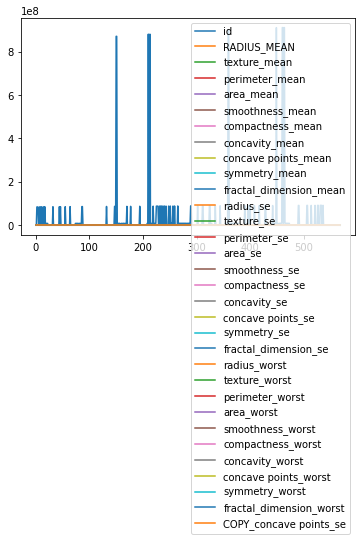

In [0]:
data.plot()
display(plt.show())


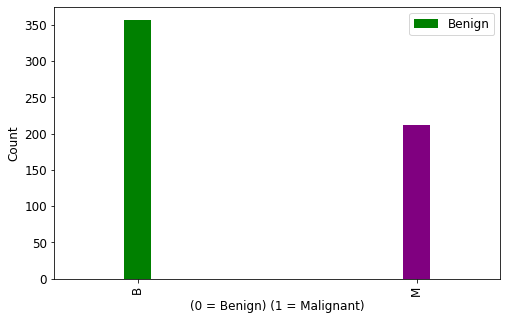

In [0]:
data.diagnosis.value_counts() \
    .plot(kind="bar", width=0.1, color=["green", "purple"], legend=1, figsize=(8, 5))
plt.xlabel("(0 = Benign) (1 = Malignant)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=12);
plt.yticks(fontsize=12)
plt.legend(["Benign"], fontsize=12)
plt.show()


Out[40]:

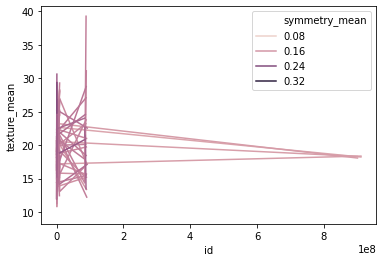

<matplotlib.axes._subplots.AxesSubplot at 0x7f2e4f90ef10>

In [0]:
sns.lineplot(x = "id", y = "texture_mean", hue = "symmetry_mean", data = data)

Out[41]:

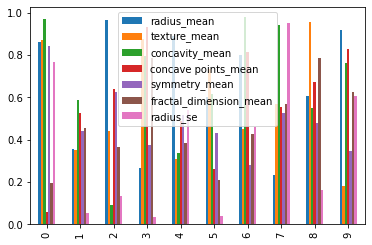

<matplotlib.axes._subplots.AxesSubplot at 0x7f2e4f41ee50>

In [0]:
data=pd.DataFrame(np.random.rand(10,7),columns=['radius_mean','texture_mean','concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',])
data.plot.bar()

No handles with labels found to put in legend.

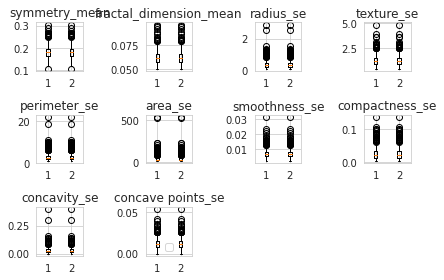

In [0]:
data=df.toPandas()
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(data.columns[10:20])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    plt.boxplot([data[b], data[b]])

    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()

Out[42]:

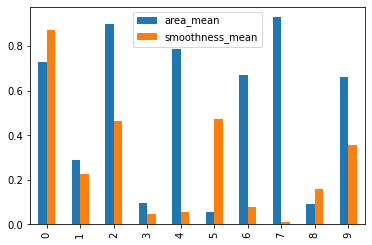

<matplotlib.axes._subplots.AxesSubplot at 0x7f2e4f3845e0>

In [0]:
data=pd.DataFrame(np.random.rand(10,2),columns=['area_mean','smoothness_mean'])
data.plot.bar()

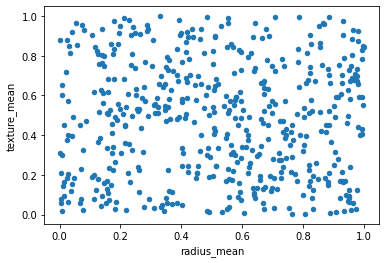

In [0]:
data=pd.DataFrame(np.random.rand(500,7),columns=['radius_mean','texture_mean','concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',])
data.plot.scatter(x='radius_mean',y='texture_mean')
plt.show()

In [0]:
data.corr

Out[44]: <bound method DataFrame.corr of radius_mean texture_mean ... fractal_dimension_mean radius_se
0 0.145854 0.796646 ... 0.703954 0.600220
1 0.115399 0.843333 ... 0.210564 0.553468
2 0.938569 0.096984 ... 0.942990 0.718086
3 0.879432 0.149308 ... 0.124237 0.518039
4 0.230781 0.165625 ... 0.707902 0.071192
.. ... ... ... ... ...
495 0.349222 0.741051 ... 0.949797 0.965053
496 0.001337 0.876998 ... 0.716039 0.305398
497 0.647194 0.297011 ... 0.164535 0.830225
498 0.413448 0.688311 ... 0.078979 0.712609
499 0.621533 0.240026 ... 0.642354 0.408257

[500 rows x 7 columns]>

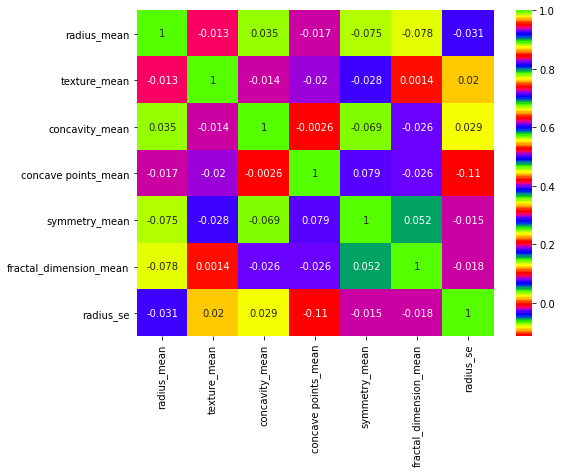

In [0]:
plt.figure(figsize=(8,6))
sns.heatmap(data=data.corr(),annot=True,cmap='prism')
plt.show()

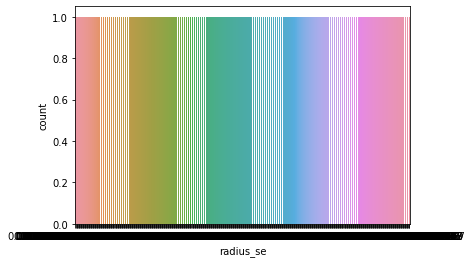

In [0]:
sns.countplot(x='radius_se',data=data)
plt.show()

In [0]:
dfM = df[df['diagnosis'] == 1]
dfB = df[df['diagnosis'] == 0]


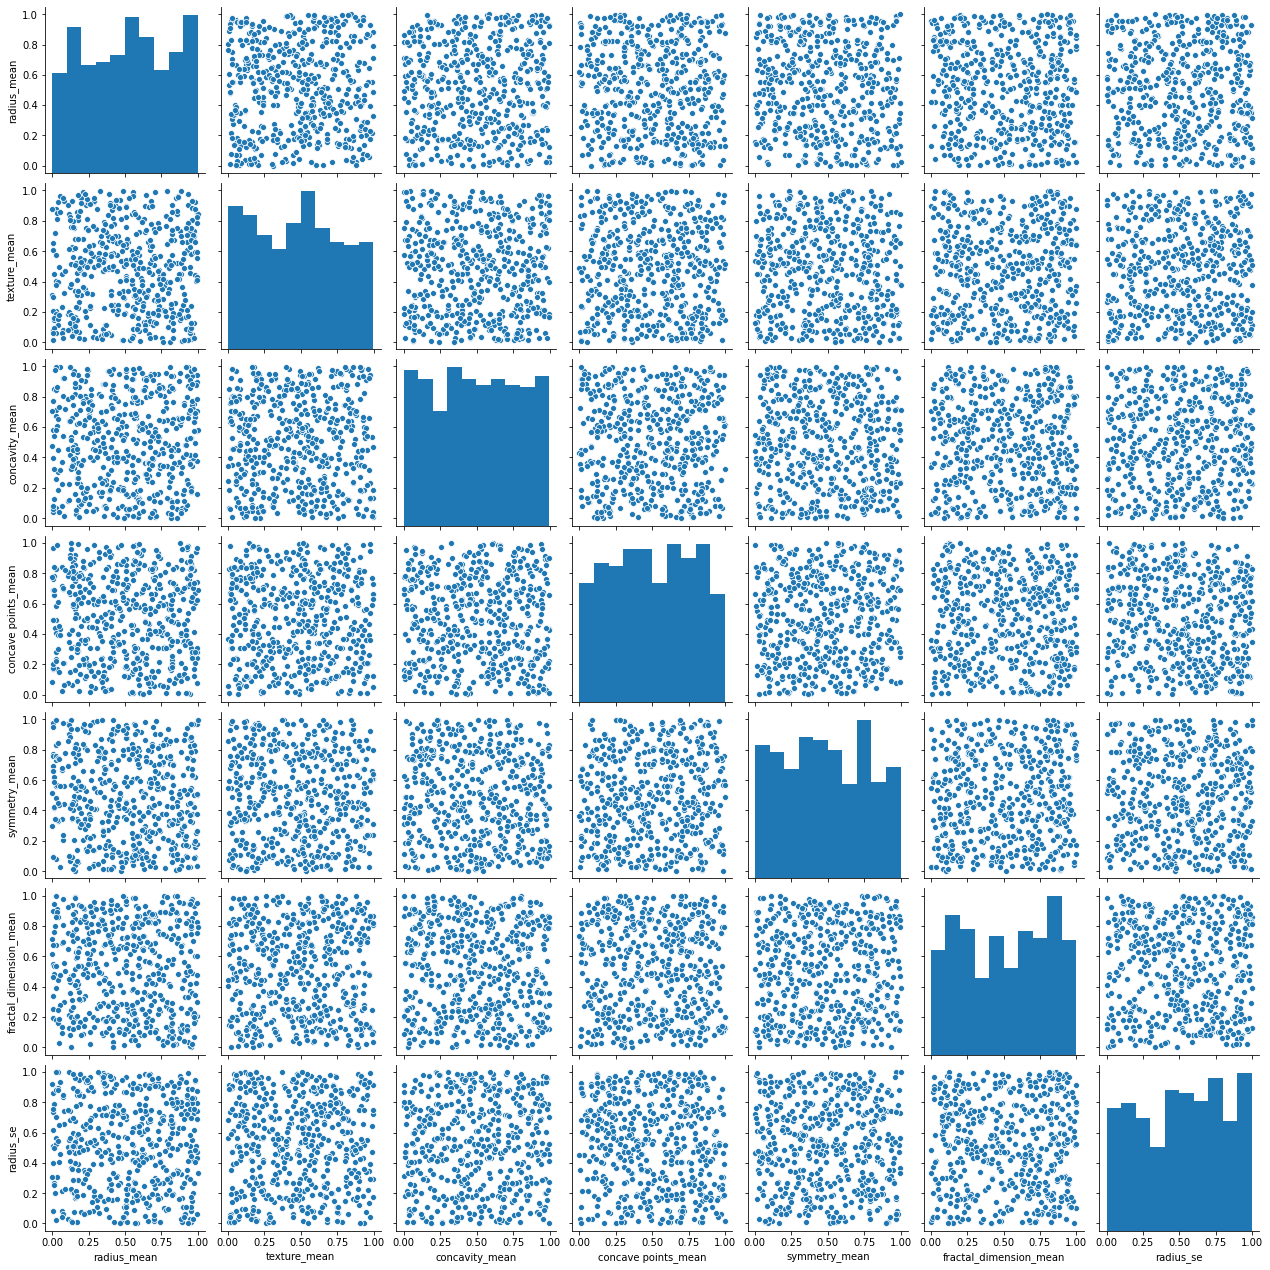

In [0]:
sns.pairplot(data)
plt.show()

Out[49]:

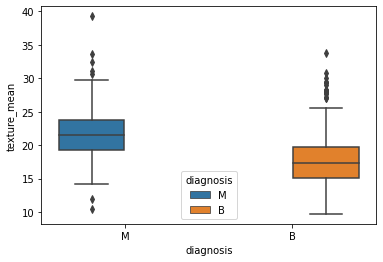

<matplotlib.axes._subplots.AxesSubplot at 0x7f2e4c685100>

In [0]:
data=df.toPandas()
import seaborn as sns
sns.boxplot(x="diagnosis", y="texture_mean", data=data,hue="diagnosis")

Out[99]:

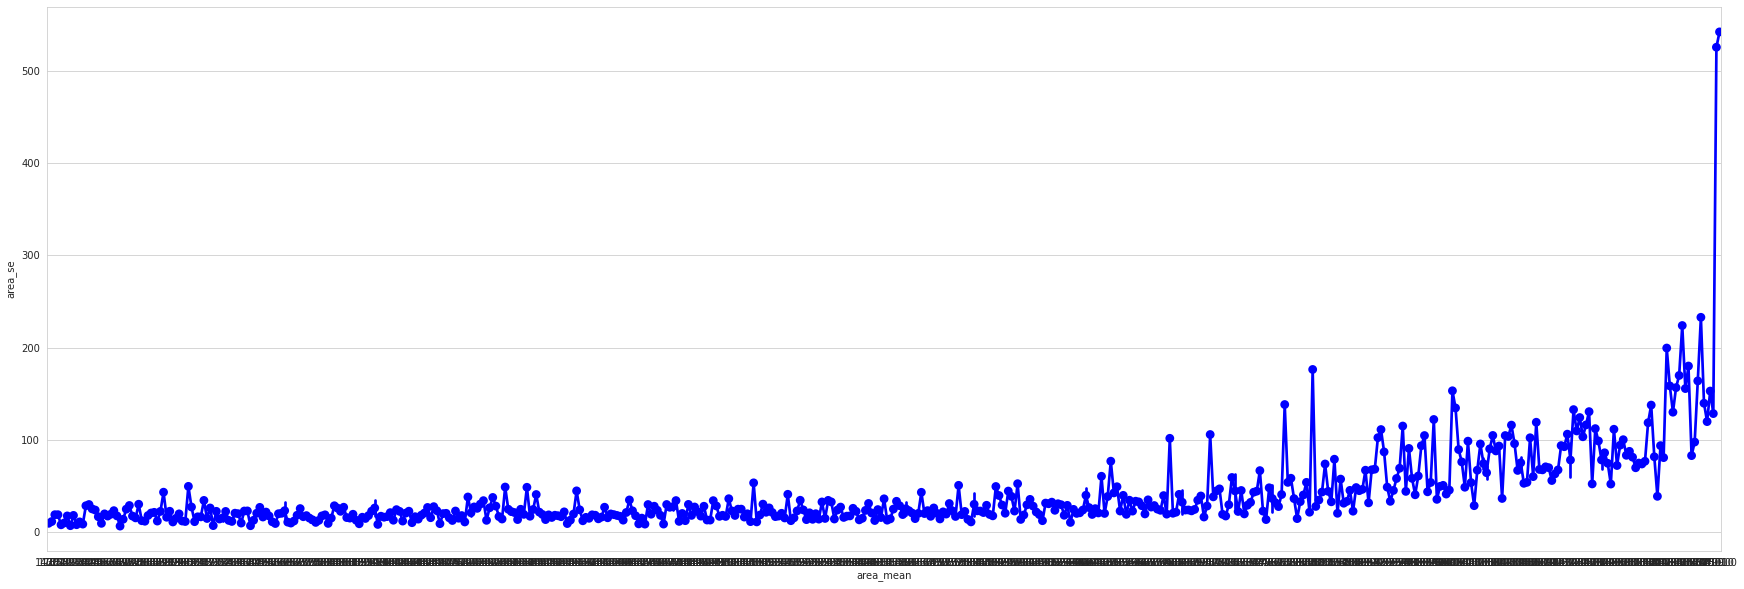

<matplotlib.axes._subplots.AxesSubplot at 0x7f2e46fa8df0>

In [0]:
data=df.toPandas()
plt.figure(figsize=(30,10))
sns.pointplot(data['area_mean'],data['area_se'],color='blue')

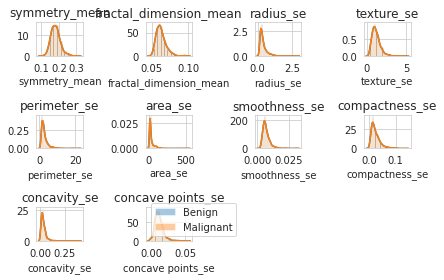

In [0]:
data=df.toPandas()
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(data.columns[10:20])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    sns.distplot(data[b], kde=True, label='Benign')
    sns.distplot(data[b], kde=True, label='Malignant')
   
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()


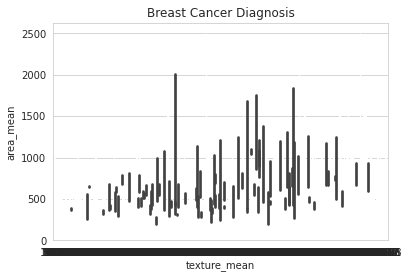

In [0]:
data=df.toPandas()
# Visualize  feature importances
sns.barplot(x = 'texture_mean', y = 'area_mean', data = data )
plt.title('Breast Cancer Diagnosis')
sns.set_style("whitegrid")

plt.show()


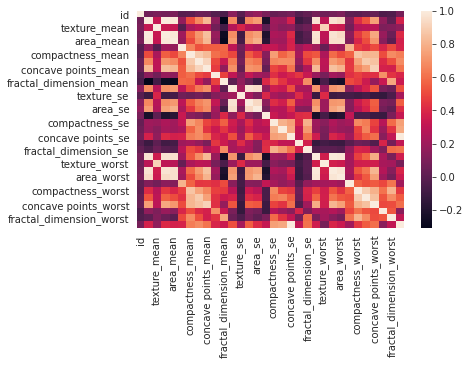

In [0]:
# Quick visualization of relationships between features and diagnoses
data=df.toPandas()
sns.heatmap(data.corr())
sns.set_style("whitegrid")
plt.show()

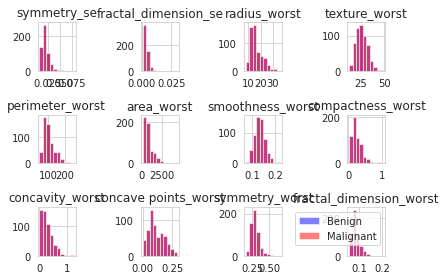

In [0]:
##HISTOGRAM
## Visualize characteristics for positive and negatives diagnoses 
data=df.toPandas()
fig = plt.figure()

for i,b in enumerate(list(df.columns[20:-1])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
# Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    ax.hist(data[b], label = 'Benign', stacked = True, alpha=0.5, color= 'b')
    ax.hist(data[b], label= 'Malignant', stacked = True, alpha=0.5, color= 'r')
    
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()

In [0]:
#Remove Duplicates (Cleaning)
distinctDF = data.distinct()
print("Distinct count: "+str(distinctDF.count()))
distinctDF.show(truncate=False)

Distinct count: 569
+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----------------------+-----------------+
id |diagnosis|RADIUS_MEAN|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|COPY_concave points_se|diagnosis_indexed|
+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----------------------+-----------------+
8510426 |B |13.54 |14.36 |87.46 |566.3 |0.09779 |0.08129 |0.06664 |0.04781 |0.1885 |0.05766 |0.2699 |0.7886 |2.058 |23.56 |0.008462 |0.0146 |0.02387 |0.01315 |0.0198 |0.0023 |15.11 |19.26 |99.7 |711.2 |0.144 |0.1773 |0.239 |0.1288 |0.2977 |0.07259 |0.01315 |0.0 |
843786 |M |12.45 |15.7 |82.57 |477.1 |0.1278 |0.17 |0.1578 |0.08089 |0.2087 |0.07613 |0.3345 |0.8902 |2.217 |27.19 |0.00751 |0.03345 |0.03672 |0.01137 |0.02165 |0.005082 |15.47 |23.75 |103.4 |741.6 |0.1791 |0.5249 |0.5355 |0.1741 |0.3985 |0.1244 |0.01137 |1.0 |
846226 |M |19.17 |24.8 |132.4 |1123.0 |0.0974 |0.2458 |0.2065 |0.1118 |0.2397 |0.078 |0.9555 |3.568 |11.07 |116.2 |0.003139 |0.08297 |0.0889 |0.0409 |0.04484 |0.01284 |20.96 |29.94 |151.7 |1332.0 |0.1037 |0.3903 |0.3639 |0.1767 |0.3176 |0.1023 |0.0409 |1.0 |
84862001|M |16.13 |20.68 |108.1 |798.8 |0.117 |0.2022 |0.1722 |0.1028 |0.2164 |0.07356 |0.5692 |1.073 |3.854 |54.18 |0.007026 |0.02501 |0.03188 |0.01297 |0.01689 |0.004142 |20.96 |31.48 |136.8 |1315.0 |0.1789 |0.4233 |0.4784 |0.2073 |0.3706 |0.1142 |0.01297 |1.0 |
845636 |M |16.02 |23.24 |102.7 |797.8 |0.08206 |0.06669 |0.03299 |0.03323 |0.1528 |0.05697 |0.3795 |1.187 |2.466 |40.51 |0.004029 |0.009269 |0.01101 |0.007591 |0.0146 |0.003042 |19.19 |33.88 |123.8 |1150.0 |0.1181 |0.1551 |0.1459 |0.09975 |0.2948 |0.08452 |0.007591 |1.0 |
84358402|M |20.29 |14.34 |135.1 |1297.0 |0.1003 |0.1328 |0.198 |0.1043 |0.1809 |0.05883 |0.7572 |0.7813 |5.438 |94.44 |0.01149 |0.02461 |0.05688 |0.01885 |0.01756 |0.005115 |22.54 |16.67 |152.2 |1575.0 |0.1374 |0.205 |0.4 |0.1625 |0.2364 |0.07678 |0.01885 |1.0 |
844981 |M |13.0 |21.82 |87.5 |519.8 |0.1273 |0.1932 |0.1859 |0.09353 |0.235 |0.07389 |0.3063 |1.002 |2.406 |24.32 |0.005731 |0.03502 |0.03553 |0.01226 |0.02143 |0.003749 |15.49 |30.73 |106.2 |739.3 |0.1703 |0.5401 |0.539 |0.206 |0.4378 |0.1072 |0.01226 |1.0 |
842302 |M |17.99 |10.38 |122.8 |1001.0 |0.1184 |0.2776 |0.3001 |0.1471 |0.2419 |0.07871 |1.095 |0.9053 |8.589 |153.4 |0.006399 |0.04904 |0.05373 |0.01587 |0.03003 |0.006193 |25.38 |17.33 |184.6 |2019.0 |0.1622 |0.6656 |0.7119 |0.2654 |0.4601 |0.1189 |0.01587 |1.0 |
84799002|M |14.54 |27.54 |96.73 |658.8 |0.1139 |0.1595 |0.1639 |0.07364 |0.2303 |0.07077 |0.37 |1.033 |2.879 |32.55 |0.005607 |0.0424 |0.04741 |0.0109 |0.01857 |0.005466 |17.46 |37.13 |124.1 |943.2 |0.1678 |0.6577 |0.7026 |0.1712 |0.4218 |0.1341 |0.0109 |1.0 |
84501001|M |12.46 |24.04 |83.97 |475.9 |0.1186 |0.2396 |0.2273

In [0]:
data=df.toPandas()
from pyspark.ml.feature import StringIndexer
indexer=StringIndexer(inputCol="diagnosis",outputCol="diagnosis_indexed")
data=indexer.fit(df).transform(df)

In [0]:
from pyspark.ml.feature import VectorAssembler
data.columns


Out[51]: ['id',
 'diagnosis',
 'RADIUS_MEAN',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'COPY_concave points_se',
 'diagnosis_indexed']

In [0]:
assembler =VectorAssembler(inputCols=['RADIUS_MEAN','perimeter_mean','area_mean','compactness_mean','concave points_mean'],outputCol='features')
output=assembler.transform(data)


In [0]:
df.columns

Out[53]: ['id',
 'diagnosis',
 'RADIUS_MEAN',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'COPY_concave points_se']

In [0]:
final_data= output.select('features','diagnosis_indexed')

In [0]:
train,test=final_data.randomSplit([0.7,0.3])

In [0]:
from pyspark.ml.classification import LogisticRegression

In [0]:
#algo=LogisticRegression(labelCol='radius_mean')
algo=LogisticRegression(featuresCol='features',labelCol='diagnosis_indexed')

In [0]:
from pyspark.ml.classification import LogisticRegression
algo=LogisticRegression(labelCol='diagnosis_indexed')

In [0]:
model=algo.fit(train)

In [0]:
a=model.summary
a.predictions.describe().show()

+-------+-------------------+-------------------+
summary| diagnosis_indexed| prediction|
+-------+-------------------+-------------------+
 count| 425| 425|
 mean| 0.3764705882352941|0.35764705882352943|
 stddev|0.48507125007266566| 0.4798723470657143|
 min| 0.0| 0.0|
 max| 1.0| 1.0|
+-------+-------------------+-------------------+

In [0]:
#evaluate
from pyspark.ml.evaluation import BinaryClassificationEvaluator
pred_and_labels=model.evaluate(test)
#pred_and_labels.predictions.show()

In [0]:
import sklearn
from sklearn.metrics import confusion_matrix

In [0]:
print("Coefficients:{} Intercepts{}".format(model.coefficients,model.intercept))
test_reasult=model.evaluate(test)
test_reasult.predictions.show()
u=test.select('features')
predictions=model.transform(u)


Coefficients:[-3.730022166902051,0.2689835253194053,0.030328613177778557,-5.40587309955339,83.83272441731725] Intercepts4.992036865791584
+--------------------+-----------------+--------------------+--------------------+----------+
 features|diagnosis_indexed| rawPrediction| probability|prediction|
+--------------------+-----------------+--------------------+--------------------+----------+
[7.691,48.34,170....| 0.0|[5.02959014400281...|[0.99350102191667...| 0.0|
[8.598,54.66,221....| 0.0|[5.35748903897530...|[0.99530938086535...| 0.0|
[8.726,55.84,230....| 0.0|[4.36361376111624...|[0.98742778023809...| 0.0|
[8.734,55.27,234....| 0.0|[6.01481148180870...|[0.99756364159863...| 0.0|
[9.029,58.79,250....| 0.0|[2.37164240031493...|[0.91463917726189...| 0.0|
[9.042,60.07,244....| 0.0|[2.11316534026322...|[0.89217621028216...| 0.0|
[9.333,59.01,264....| 0.0|[5.16905197007356...|[0.99434223196083...| 0.0|
[9.405,59.6,271.2...| 0.0|[5.11145398934791...|[0.99400879794878...| 0.0|
[9.567,60.21,279....| 0.0|[4.84115341851413...|[0.99216394948357...| 0.0|
[9.606,61.64,280....| 0.0|[4.32864349839636...|[0.98698617140455...| 0.0|
[9.668,61.06,286....| 0.0|[5.77240123969680...|[0.99689738098868...| 0.0|
[9.742,61.5,289.9...| 0.0|[5.08504227387317...|[0.99384943805667...| 0.0|
[9.742,61.93,289....| 0.0|[4.70297183963213...|[0.99101320729914...| 0.0|
[9.876,62.92,295....| 0.0|[4.71668427065396...|[0.99113451198141...| 0.0|
[9.904,64.6,302.4...| 0.0|[2.98669025434721...|[0.95196920204911...| 0.0|
[10.03,63.19,307....| 0.0|[5.88201840415699...|[0.99721860776213...| 0.0|
[10.18,65.12,313....| 0.0|[4.82170349684155...|[0.99201127655542...| 0.0|
[10.26,65.75,321....| 0.0|[4.59652471153449...|[0.99001389855805...| 0.0|
[10.8,68.79,359.9...| 0.0|[5.00700578863439...|[0.99335356335772...| 0.0|
[10.82,68.89,361....| 0.0|[5.54252210653725...|[0.99609864399498...| 0.0|
+--------------------+-----------------+--------------------+--------------------+----------+
only showing top 20 rows

In [0]:
predictions.show()

+--------------------+--------------------+--------------------+----------+
 features| rawPrediction| probability|prediction|
+--------------------+--------------------+--------------------+----------+
[7.691,48.34,170....|[5.02959014400281...|[0.99350102191667...| 0.0|
[8.598,54.66,221....|[5.35748903897530...|[0.99530938086535...| 0.0|
[8.726,55.84,230....|[4.36361376111624...|[0.98742778023809...| 0.0|
[8.734,55.27,234....|[6.01481148180870...|[0.99756364159863...| 0.0|
[9.029,58.79,250....|[2.37164240031493...|[0.91463917726189...| 0.0|
[9.042,60.07,244....|[2.11316534026322...|[0.89217621028216...| 0.0|
[9.333,59.01,264....|[5.16905197007356...|[0.99434223196083...| 0.0|
[9.405,59.6,271.2...|[5.11145398934791...|[0.99400879794878...| 0.0|
[9.567,60.21,279....|[4.84115341851413...|[0.99216394948357...| 0.0|
[9.606,61.64,280....|[4.32864349839636...|[0.98698617140455...| 0.0|
[9.668,61.06,286....|[5.77240123969680...|[0.99689738098868...| 0.0|
[9.742,61.5,289.9...|[5.08504227387317...|[0.99384943805667...| 0.0|
[9.742,61.93,289....|[4.70297183963213...|[0.99101320729914...| 0.0|
[9.876,62.92,295....|[4.71668427065396...|[0.99113451198141...| 0.0|
[9.904,64.6,302.4...|[2.98669025434721...|[0.95196920204911...| 0.0|
[10.03,63.19,307....|[5.88201840415699...|[0.99721860776213...| 0.0|
[10.18,65.12,313....|[4.82170349684155...|[0.99201127655542...| 0.0|
[10.26,65.75,321....|[4.59652471153449...|[0.99001389855805...| 0.0|
[10.8,68.79,359.9...|[5.00700578863439...|[0.99335356335772...| 0.0|
[10.82,68.89,361....|[5.54252210653725...|[0.99609864399498...| 0.0|
+--------------------+--------------------+--------------------+----------+
only showing top 20 rows

In [0]:
a=model.transform(train)
a.show()
y_true=a.select(['diagnosis_indexed']).collect()
y_pred=a.select(['prediction']).collect()

+--------------------+-----------------+--------------------+--------------------+----------+
 features|diagnosis_indexed| rawPrediction| probability|prediction|
+--------------------+-----------------+--------------------+--------------------+----------+
[6.981,43.79,143....| 0.0|[5.32541979277785...|[0.99515725852580...| 0.0|
[7.729,47.98,178....| 0.0|[5.77241737097871...|[0.99689743088222...| 0.0|
[7.76,47.92,181.0...| 0.0|[5.80956981548702...|[0.99701024563788...| 0.0|
[8.196,51.71,201....| 0.0|[5.37197252720687...|[0.99537651594032...| 0.0|
[8.219,53.27,203....| 0.0|[4.04023167738688...|[0.98271078013927...| 0.0|
[8.571,54.53,221....| 0.0|[4.74529149107274...|[0.99138238105044...| 0.0|
[8.597,54.09,221....| 0.0|[6.13303698374497...|[0.99783471787336...| 0.0|
[8.618,54.34,224....| 0.0|[5.35914195638031...|[0.99531709138962...| 0.0|
[8.671,54.42,227....| 0.0|[6.05339611527967...|[0.99765564091718...| 0.0|
[8.878,56.74,241....| 0.0|[3.97186587232443...|[0.98151006743052...| 0.0|
[8.888,58.79,244....| 0.0|[3.36664041100431...|[0.96664554114983...| 0.0|
[8.95,58.74,245.2...| 0.0|[3.89208404625140...|[0.98000516880916...| 0.0|
[9.0,56.36,246.3,...| 0.0|[5.82569351024349...|[0.99705792428831...| 0.0|
[9.173,59.2,260.9...| 0.0|[4.03241115685410...|[0.98257740430725...| 0.0|
[9.268,61.49,248....| 0.0|[2.30276580844537...|[0.90910584314807...| 0.0|
[9.295,59.96,257....| 0.0|[4.36417971673215...|[0.98743480416330...| 0.0|
[9.397,59.75,268....| 0.0|[5.73220786446960...|[0.99677054712062...| 0.0|
[9.423,59.26,271....| 0.0|[6.25657149914596...|[0.99808586120373...| 0.0|
[9.436,59.82,278....| 0.0|[4.80759188166215...|[0.99189866335047...| 0.0|
[9.465,60.11,269....| 0.0|[5.13284918768516...|[0.99413487555887...| 0.0|
+--------------------+-----------------+--------------------+--------------------+----------+
only showing top 20 rows

In [0]:
import sklearn
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm

Out[166]: array([[251, 14],
 [ 22, 138]])

In [0]:
#accurracy
accurracy=(251+138)/(251+14+22+138)
accurracy


Out[168]: 0.9152941176470588

In [0]:
#recall
recall=251/(251+22)
recall


Out[169]: 0.9194139194139194

In [0]:
#precision
precision=251/(251+14)
precision

Out[170]: 0.9471698113207547

In [0]:
#specificity
specificity

In [0]:
def plot_feat1_feat2(feat1, feat2) :  
    trace0 = go.Scatter(
        x = M[feat1],
        y = M[feat2],
        name = 'malignant',
        mode = 'markers', 
        marker = dict(color = '#800080',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = B[feat1],
        y = B[feat2],
        name = 'benign',
        mode = 'markers',
        marker = dict(color = '#FFD701',
            line = dict(
                width = 1)))
    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [0]:
plot_feat1_feat2('perimeter_mean','radius_worst')
plot_feat1_feat2('area_mean','radius_worst')
plot_feat1_feat2('texture_mean','texture_worst')
plot_feat1_feat2('area_worst','radius_worst')

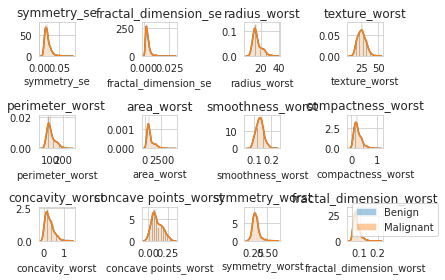

In [0]:
data=df.toPandas()
fig = plt.figure()

# Create 'for loop' to enerate though tumor features and compare with histograms
for i,b in enumerate(list(data.columns[20:-1])):
    
    # Enumerate starts at index 0, need to add 1 for subplotting
    i +=1
    
    # Create axes object for position i
    ax = fig.add_subplot(3,4,i)
    
    # Plot via histogram tumor charateristics using stacked and alpha parameters for..
    # comparisons.
    sns.distplot(data[b], kde=True, label='Benign')
    sns.distplot(data[b], kde=True, label='Malignant')
    
    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()